In [172]:
# Run this cell to set up the notebook
import pandas as pd
import numpy as np

# These lines set up the plotting functionality and formatting.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

## NSOT (NBA Salary Optimization)

In this project, our tool will assist NBA managers in optimizing player salaries by analyzing how player statistics impacts their contract.

![](nba_PNG.png)

## WHY
The increasing popularity of data and analytics has changed many aspects of the NBA, including roster building and in game strategies. One aspect of the NBA that has remained stagnant is the *financial side*. Many players are still getting overpaid/underpaid which can negatively affect team and player performance.

## BENEFITS
As a result of our project, we are hoping that it could help team managers determine a player’s true worth and avoid underpaying or overpaying their players.

Our model will use basketball data, such as statistics to accurately identify the true value of the player. This will allow NBA managers to give out the most optimal contracts.

### 1. NBA Dataset

In [173]:
#Run the cell below to read the NBA table.
nba = pd.read_csv('dataxnba.csv')
nba = nba.drop_duplicates(subset=['Player'])
nba

,Player,Season,Pos,Age,Tm,G,GS,MP,FG,FGA,...,WS48,OBPM,DBPM,BPM,VORP,Salary,SalaryIn,Cap,pCap,Experience
0,Aaron Gordon 2020,2020,PF,24,ORL,62,62,32.5,5.4,12.4,...,0.087,-0.1,0.1,0.0,1.0,19863636.0,19991902,109140000.0,0.182001,6
1,Aaron Holiday 2020,2020,PG,23,IND,66,33,24.5,3.5,8.5,...,0.063,-1.6,0.0,-1.6,0.2,2239200.0,2253659,109140000.0,0.020517,2
2,Abdel Nader 2020,2020,SF,26,OKC,55,6,15.8,2.2,4.8,...,0.074,-1.1,0.2,-1.0,0.2,1618520.0,1628971,109140000.0,0.014830,3
3,Admiral Schofield 2020,2020,PF,22,WAS,33,2,11.2,1.1,2.8,...,0.017,-4.3,-1.2,-5.5,-0.3,1000000.0,1006457,109140000.0,0.009163,1
4,Al Horford 2020,2020,C,33,PHI,67,61,30.2,4.8,10.6,...,0.128,1.3,1.0,2.2,2.2,28000000.0,28180805,109140000.0,0.256551,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Willie Anderson 1991,1991,SG,24,SAS,75,75,34.6,6.0,13.2,...,0.089,-0.9,1.0,0.1,1.4,725000.0,1438820,11871000.0,0.061073,1
10836,Willie Burton 1991,1991,SF,22,MIA,76,26,25.4,4.5,10.2,...,0.052,-2.8,-0.7,-3.4,-0.7,2000000.0,3969160,11871000.0,0.168478,0
10837,Winston Bennett 1991,1991,SF,25,CLE,27,13,12.4,1.5,4.0,...,0.026,-4.2,-1.4,-5.5,-0.3,525000.0,1041904,11871000.0,0.044225,1
10838,Winston Garland 1991,1991,PG,26,LAC,69,26,24.7,3.2,7.5,...,0.069,-2.5,1.6,-0.9,0.5,450000.0,893061,11871000.0,0.037908,0


In [174]:
#Set Player column as index
nba.set_index("Player")

,Season,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,WS48,OBPM,DBPM,BPM,VORP,Salary,SalaryIn,Cap,pCap,Experience
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon 2020,2020,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,...,0.087,-0.1,0.1,0.0,1.0,19863636.0,19991902,109140000.0,0.182001,6
Aaron Holiday 2020,2020,PG,23,IND,66,33,24.5,3.5,8.5,0.414,...,0.063,-1.6,0.0,-1.6,0.2,2239200.0,2253659,109140000.0,0.020517,2
Abdel Nader 2020,2020,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,...,0.074,-1.1,0.2,-1.0,0.2,1618520.0,1628971,109140000.0,0.014830,3
Admiral Schofield 2020,2020,PF,22,WAS,33,2,11.2,1.1,2.8,0.380,...,0.017,-4.3,-1.2,-5.5,-0.3,1000000.0,1006457,109140000.0,0.009163,1
Al Horford 2020,2020,C,33,PHI,67,61,30.2,4.8,10.6,0.450,...,0.128,1.3,1.0,2.2,2.2,28000000.0,28180805,109140000.0,0.256551,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Anderson 1991,1991,SG,24,SAS,75,75,34.6,6.0,13.2,0.457,...,0.089,-0.9,1.0,0.1,1.4,725000.0,1438820,11871000.0,0.061073,1
Willie Burton 1991,1991,SF,22,MIA,76,26,25.4,4.5,10.2,0.441,...,0.052,-2.8,-0.7,-3.4,-0.7,2000000.0,3969160,11871000.0,0.168478,0
Winston Bennett 1991,1991,SF,25,CLE,27,13,12.4,1.5,4.0,0.374,...,0.026,-4.2,-1.4,-5.5,-0.3,525000.0,1041904,11871000.0,0.044225,1


### 2. Exploratory Data Analysis

In [175]:
#Filter by position
pg= nba.loc[nba['Pos'].isin(['PG','PG-SG',"SG-PG", "PG-SF"])]
sg= nba.loc[nba['Pos'].isin(["SG","SF-SG","SG-PG", "SG-PF", "PG-SG","SG-SF"])]
sf= nba.loc[nba['Pos'].isin(["SF","PG-SF","PF-SF","SF-SG","SF-PF","SG-SF","SF-C" ])]
pf= nba.loc[nba['Pos'].isin(["PF","SF-PF","PF-SF","PF-C","C-PF"])]
c = nba.loc[nba['Pos'].isin(["C","C-PF","PF-C","SF-C"])]
pg

,Player,Season,Pos,Age,Tm,G,GS,MP,FG,FGA,...,WS48,OBPM,DBPM,BPM,VORP,Salary,SalaryIn,Cap,pCap,Experience
1,Aaron Holiday 2020,2020,PG,23,IND,66,33,24.5,3.5,8.5,...,0.063,-1.6,0.0,-1.6,0.2,2239200.0,2253659,109140000.0,0.020517,2
6,Alex Caruso 2020,2020,PG,25,LAL,64,2,18.4,1.9,4.5,...,0.095,-2.6,2.4,-0.2,0.5,2750000.0,2767757,109140000.0,0.025197,3
22,Ben Simmons 2020,2020,PG,23,PHI,57,57,35.4,6.6,11.4,...,0.165,1.3,2.3,3.6,2.8,8113929.0,8166323,109140000.0,0.074344,3
28,Brad Wanamaker 2020,2020,PG,30,BOS,71,1,19.3,2.3,5.1,...,0.124,-1.9,1.3,-0.6,0.5,1445697.0,1455032,109140000.0,0.013246,2
31,Brandon Goodwin 2020,2020,PG,24,ATL,34,1,12.6,2.2,5.6,...,0.013,-1.6,-1.3,-2.9,-0.1,522738.0,526113,109140000.0,0.004790,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,Terry Porter 1991,1991,PG,27,POR,81,81,32.9,6.0,11.7,...,0.235,5.6,1.8,7.4,6.2,2000000.0,3969160,11871000.0,0.168478,1
10807,Tim Hardaway 1991,1991,PG,24,GSW,82,82,39.2,9.0,18.9,...,0.148,4.5,-0.1,4.4,5.2,500000.0,992290,11871000.0,0.042119,0
10820,Travis Mays 1991,1991,PG,22,SAC,64,55,33.5,4.6,11.3,...,0.047,-0.8,-1.1,-1.9,0.0,800000.0,1587664,11871000.0,0.067391,0
10825,Vern Fleming 1991,1991,PG,28,IND,69,45,28.0,5.2,9.7,...,0.109,2.6,-1.0,1.6,1.8,667000.0,1323715,11871000.0,0.056187,1


In [176]:
!pip install pandas plotnine

#### Pre-Visualization

In [177]:
# Libraries needed for ggplot made from R
from plotnine import *
from plotnine.data import *
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_bar

In [178]:
#Plot histogram of average (inflated) salary by season for the entire nba + all positions (6 total)
g1 = ggplot(nba) + aes(x = 'Season', y ='SalaryIn') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("Average Salary")
g2 = ggplot(pg) + aes(x = 'Season', y ='SalaryIn') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("PG Avg Salary")
g3 = ggplot(sg) + aes(x = 'Season', y ='SalaryIn') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("SG Avg Salary")
g4 = ggplot(sf) + aes(x = 'Season', y ='SalaryIn') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("SF Avg Salary")
g5 = ggplot(pf) + aes(x = 'Season', y ='SalaryIn') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("PF Avg Salary")
g6 = ggplot(c) + aes(x = 'Season', y ='SalaryIn') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("C Avg Salary")

NBA Average Salary
 

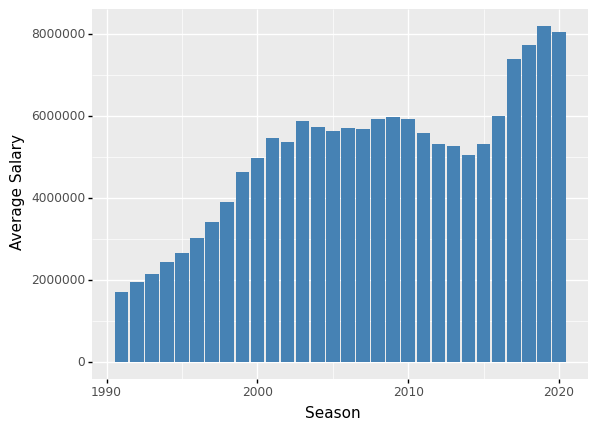

 PG Avg Salary
 

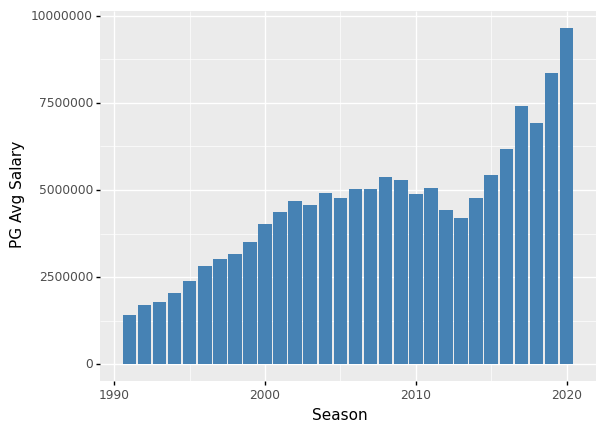

 SG Avg Salary
 

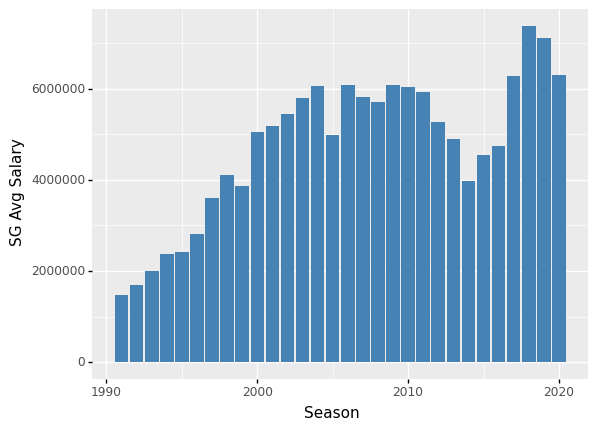

In [179]:
print('NBA Average Salary\n', g1, 'PG Avg Salary\n', g2, 'SG Avg Salary\n', g3)

SF Average Salary
 

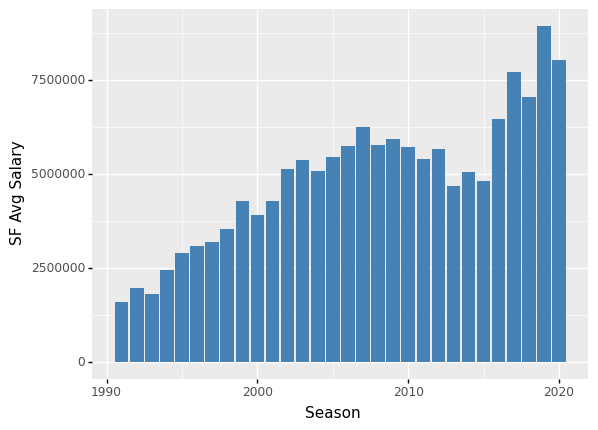

 PF Average Salary
 

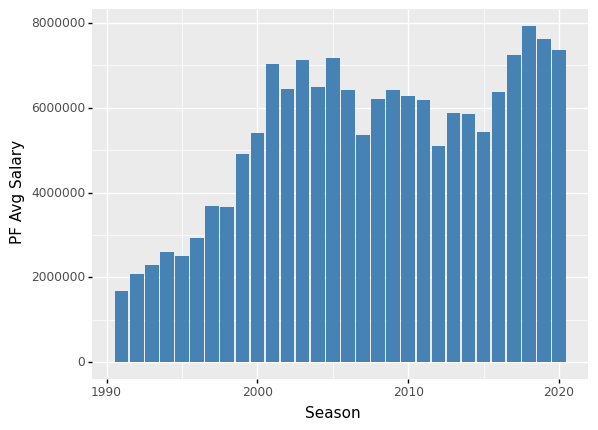

 Center Average Salary
 

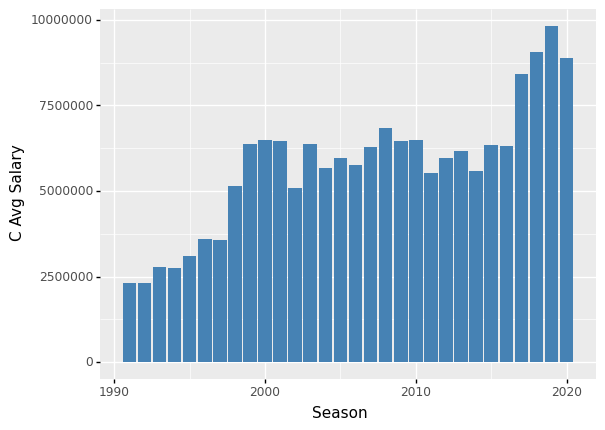

In [180]:
print('SF Average Salary\n', g4, 'PF Average Salary\n',g5, 'Center Average Salary\n', g6)

In [181]:
#Plot histogram of average pCap by season for the entire nba + all positions (6 total)
g7 = ggplot(nba) + aes(x = 'Season', y ='pCap') + geom_bar(stat =stat_summary, fill = 'steelblue') + ylab("Average pCap")
g8 = ggplot(pg) + aes(x = 'Season', y ='pCap') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("PG Avg pCap")
g9 = ggplot(sg) + aes(x = 'Season', y ='pCap') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("SG Avg pCap")
g10 = ggplot(sf) + aes(x = 'Season', y ='pCap') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("SF Avg pCap")
g11 = ggplot(pf) + aes(x = 'Season', y ='pCap') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("PF Avg pCap")
g12 = ggplot(c) + aes(x = 'Season', y ='pCap') + geom_bar(stat = stat_summary, fill = 'steelblue') + ylab("Center Avg pCap")

NBA Avg pCap
 

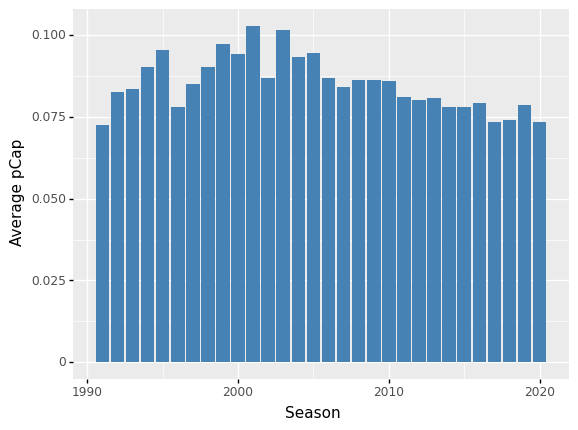

 PG Avg pCap
 

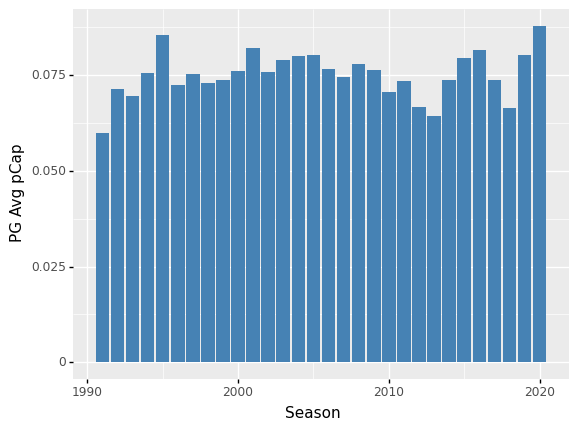

 SG Avg pCap
 

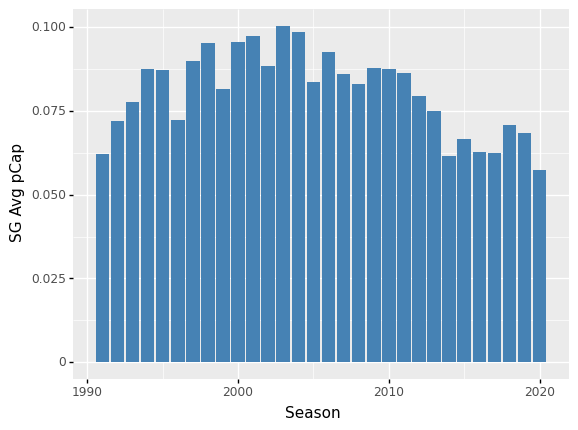

In [182]:
print('NBA Avg pCap\n', g7, 'PG Avg pCap\n', g8, 'SG Avg pCap\n', g9)

SF Avg pCap
 

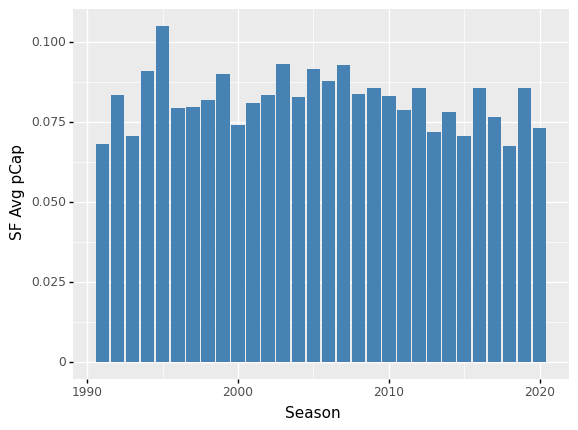

 PF Avg pCap
 

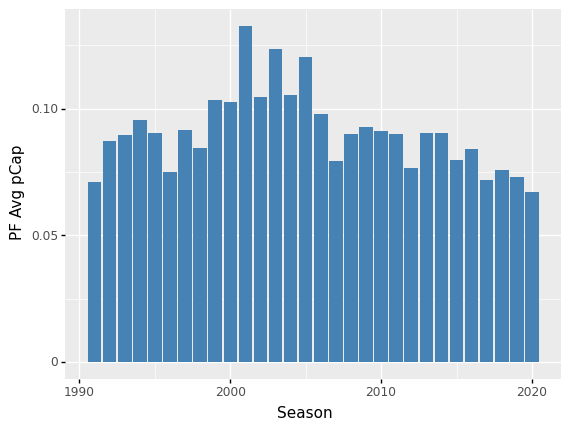

 Center Avg pCap
 

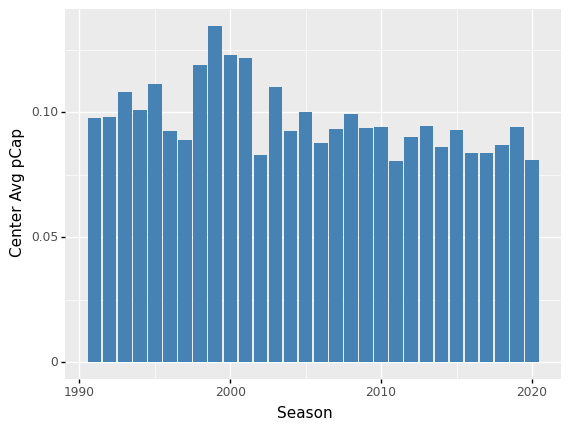

In [183]:
print('SF Avg pCap\n', g10, 'PF Avg pCap\n', g11, 'Center Avg pCap\n', g12)

Text(0.5, 1.0, 'C Corr Plot')

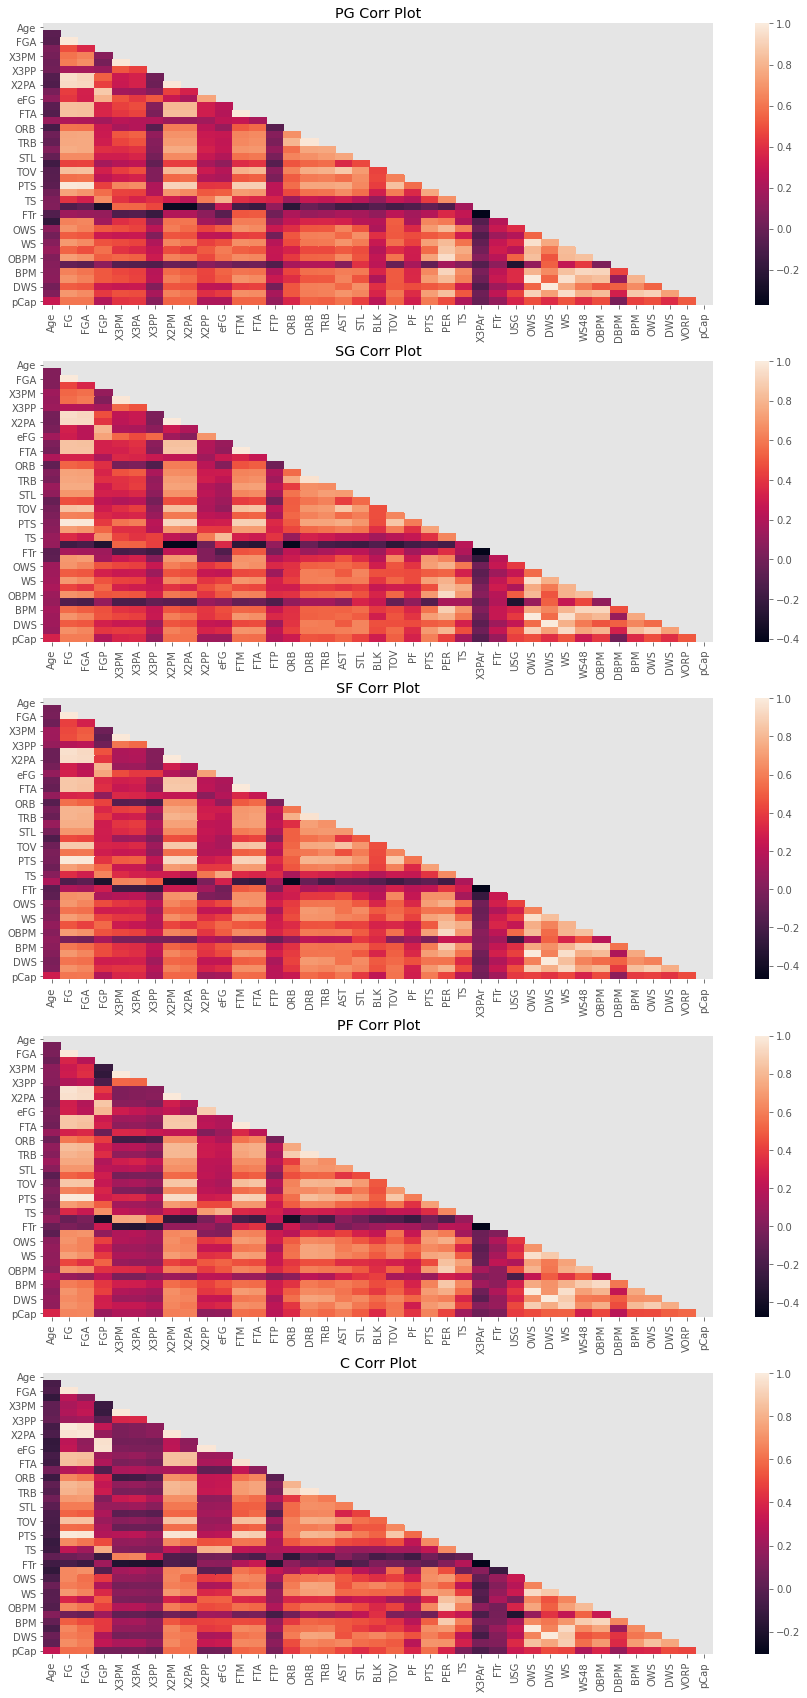

In [184]:
#Plot correlation matrix for all positions with these selected variables

corr1 = pg[['Age', 'FG', 'FGA', 'FGP', 'X3PM', 'X3PA', 'X3PP', 'X2PM', 'X2PA', 'X2PP', 'eFG', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'WS', 'WS48', 'OBPM', 'DBPM', 'BPM', 'OWS', 'DWS', 'VORP', 'pCap']].corr()
corr2 = sg[['Age', 'FG', 'FGA', 'FGP', 'X3PM', 'X3PA', 'X3PP', 'X2PM', 'X2PA', 'X2PP', 'eFG', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'WS', 'WS48', 'OBPM', 'DBPM', 'BPM', 'OWS', 'DWS', 'VORP', 'pCap']].corr()
corr3 = sf[['Age', 'FG', 'FGA', 'FGP', 'X3PM', 'X3PA', 'X3PP', 'X2PM', 'X2PA', 'X2PP', 'eFG', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'WS', 'WS48', 'OBPM', 'DBPM', 'BPM', 'OWS', 'DWS', 'VORP', 'pCap']].corr()
corr4 = pf[['Age', 'FG', 'FGA', 'FGP', 'X3PM', 'X3PA', 'X3PP', 'X2PM', 'X2PA', 'X2PP', 'eFG', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'WS', 'WS48', 'OBPM', 'DBPM', 'BPM', 'OWS', 'DWS', 'VORP', 'pCap']].corr()
corr5 = c[['Age', 'FG', 'FGA', 'FGP', 'X3PM', 'X3PA', 'X3PP', 'X2PM', 'X2PA', 'X2PP', 'eFG', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'WS', 'WS48', 'OBPM', 'DBPM', 'BPM', 'OWS', 'DWS', 'VORP', 'pCap']].corr()

fig, axs = plt.subplots(5, 1, figsize=(15, 30))
mask1 = np.triu(np.ones_like(corr1, dtype=bool))
mask2 = np.triu(np.ones_like(corr2, dtype=bool))
mask3 = np.triu(np.ones_like(corr3, dtype=bool))
mask4 = np.triu(np.ones_like(corr4, dtype=bool))
mask5 = np.triu(np.ones_like(corr5, dtype=bool))

sns.heatmap(corr1, mask=mask1, ax=axs[0])
sns.heatmap(corr2, mask=mask2, ax=axs[1])
sns.heatmap(corr3, mask=mask3, ax=axs[2])
sns.heatmap(corr4, mask=mask4, ax=axs[3])
sns.heatmap(corr5, mask=mask5, ax=axs[4])

axs[0].set_title('PG Corr Plot')
axs[1].set_title('SG Corr Plot')
axs[2].set_title('SF Corr Plot')
axs[3].set_title('PF Corr Plot')
axs[4].set_title('C Corr Plot')

### 3. Feature Engineering and Selection

In [185]:
#Create a copy of nba + all positions and keep only these variables in the copy
nbacopy = nba[['Season', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'pCap', 'Experience']]
pgcopy = pg[['Season', 'Pos','Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'pCap', 'Experience']]
sgcopy = sg[['Season', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'pCap', 'Experience']]
sfcopy = sf[['Season', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'pCap', 'Experience']]
pfcopy = pf[['Season', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'pCap', 'Experience']]
ccopy = c[['Season', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'pCap', 'Experience']]

In [186]:
#RANDOM SPLIT 
trainpg, testpg = train_test_split(pgcopy, test_size=0.25, random_state=123)
trainsg, testsg = train_test_split(sgcopy, test_size=0.25, random_state=123)
trainsf, testsf = train_test_split(sfcopy, test_size=0.25, random_state=123)
trainpf, testpf = train_test_split(pfcopy, test_size=0.25, random_state=123)
traincenter, testcenter = train_test_split(ccopy, test_size=0.25, random_state=123)

#### Train and Test Split Data by Position

In [187]:
# Split all Point Guard position data into train_x train_y test_x test_y.
xpgtrain = trainpg.drop(['pCap'], axis=1)
ypgtrain = trainpg['pCap']
xpgtest = testpg.drop(['pCap'], axis=1)
ypgtest = testpg['pCap']

In [188]:
# Split all Shooting Guard position data into train_x train_y test_x test_y.
xsgtrain = trainsg.drop(['pCap'], axis=1)
ysgtrain = trainsg['pCap']
xsgtest= testsg.drop(['pCap'], axis=1)
ysgtest = testsg['pCap']

In [189]:
# Split all Small Forward position data into train_x train_y test_x test_y.
xsftrain = trainsf.drop(['pCap'], axis=1)
ysftrain = trainsf['pCap']
xsftest = testsf.drop(['pCap'], axis=1)
ysftest = testsf['pCap']

In [190]:
# Split all Power Forward position data into train_x train_y test_x test_y.
xpftrain = trainpf.drop(['pCap'], axis=1)
ypftrain = trainpf['pCap']
xpftest = testpf.drop(['pCap'], axis=1)
ypftest = testpf['pCap']

In [191]:
# Split all Center position data into train_x train_y test_x test_y.
xctrain = traincenter.drop(['pCap'], axis=1)
yctrain = traincenter['pCap']
xctest = testcenter.drop(['pCap'], axis=1)
yctest = testcenter['pCap']

#### Helper Functions

In [192]:
# Print metrics for R2, MAE, and RMSE2 from train and test sets.
def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):
        
        y_pred_train = pd.Series(model.predict(X_train)).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).reset_index(drop=True)
        y_train = y_train.copy().reset_index(drop=True)
        y_test = y_test.copy().reset_index(drop=True)
        
        print("\nMetrics for Log(lasso):\n")
        
    elif (flag_log_sale_price == False):
        
        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp).reset_index(drop=True)
        y_train = y_train.copy().apply(np.exp).reset_index(drop=True)
        y_test = y_test.copy().apply(np.exp).reset_index(drop=True)
        
        print("\nMetrics for lasso:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))
    print('Training RMSE', RMSE(y_train, y_pred_train))

    print('Test R2', OSR2(y_test, y_test, y_pred_test))
    print('Test MAE', MAE(y_test, y_pred_test))
    print('Test RMSE', RMSE(y_test, y_pred_test))
    
    return None

In [193]:
# OSR2 function
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

# MAE function
def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

# RMSE Function
def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

In [194]:
# The One Standard Error Rule can be used to compare models with different numbers of parameters in order to select the most parsimonious model with low error.
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    range_x = param_grid 
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    
    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
    
    return x_min, x_1se

### 4. Model Selection(Lasso, Ridge, Decision Tree)

### 4-1) Lasso Regression

### PG Lasso Regression

#### Categorical variables to Numberical variables for PG

In [195]:
from sklearn.preprocessing import OneHotEncoder
# One Hot Encoder for pg categorical values to numerical 
pgdrop_enc = OneHotEncoder(drop='first').fit(xpgtrain[['Pos', 'Tm']])

xpgtrain_cat = pgdrop_enc.transform(xpgtrain[['Pos', 'Tm']]).toarray()
xpgtrain_num = xpgtrain[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xpgtrain_enc = np.concatenate((xpgtrain_cat, xpgtrain_num), axis = 1)

xpgtest_cat = pgdrop_enc.transform(xpgtest[['Pos', 'Tm']]).toarray()
xpgtest_num = xpgtest[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xpgtest_enc = np.concatenate((xpgtest_cat, xpgtest_num), axis = 1)

#### Lasso Coefficients

In [196]:
alphas1 = np.logspace(-5, 1 , num=50, base=10)
coefs1 = []

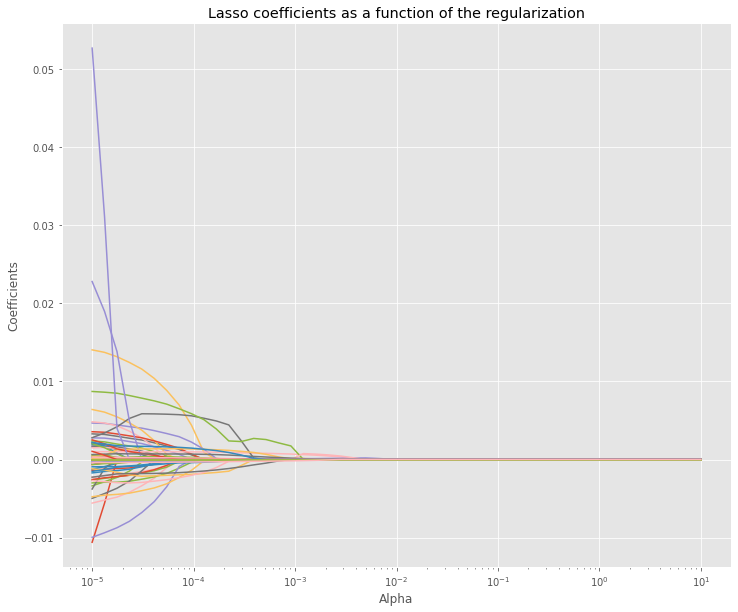

In [197]:
from sklearn.linear_model import Lasso

for a in alphas1:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(xpgtrain_enc, ypgtrain)
    coefs1.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas1, coefs1)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

#### PG Lasso Hyper-parameter Tuning

In [198]:
from sklearn.model_selection import GridSearchCV
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_PG = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_PG.fit(xpgtrain_enc, ypgtrain)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

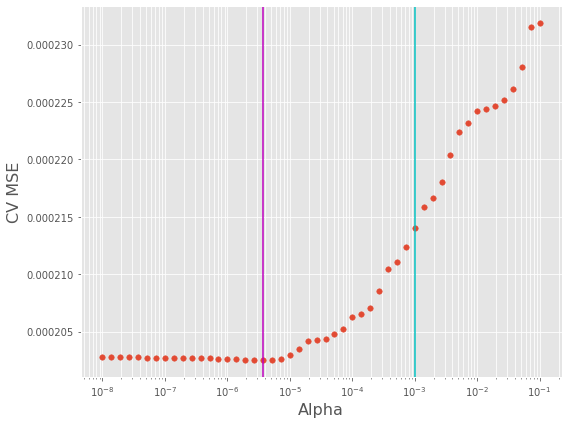

In [199]:
range_alpha = lasso_PG.cv_results_['param_alpha'].data
MSE_scores = lasso_PG.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_PG.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [200]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.001


#### PG Lasso Refit with One Standard Error Rule

In [201]:
lasso_PG = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_PG = lasso_PG.fit(xpgtrain_enc, ypgtrain)

print_metrics(lasso_PG, xpgtrain_enc, ypgtrain, xpgtest_enc, ypgtest, flag_log_sale_price = True)
print_metrics(lasso_PG, xpgtrain_enc, ypgtrain, xpgtest_enc, ypgtest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9616557802219355
Training MAE 0.010107747102276642
Training RMSE 0.0144255763188265
Test R2 0.9589466147722453
Test MAE 0.0106287887878575
Test RMSE 0.015053371308751666

Metrics for lasso:

Training R2 0.9604117006134684
Training MAE 0.011321741139764802
Training RMSE 0.016886150812506023
Test R2 0.957616448247407
Test MAE 0.011959690790195559
Test RMSE 0.017589166268934146


#### PG Selected Variables
Let's look at some of the variables selected by lasso.

In [202]:
cols = xpgtrain.columns
coefs1 = lasso_PG.best_estimator_.coef_
sorted(zip(abs(coefs1), cols))[-28:]

[(0.0, 'Cap'),
 (0.0, 'DBPM'),
 (0.0, 'DRBP'),
 (0.0, 'Experience'),
 (0.0, 'FG'),
 (0.0, 'FGA'),
 (0.0, 'G'),
 (0.0, 'GS'),
 (0.0, 'MP'),
 (0.0, 'OBPM'),
 (0.0, 'ORBP'),
 (0.0, 'PER'),
 (0.0, 'Pos'),
 (0.0, 'STLP'),
 (0.0, 'Salary'),
 (0.0, 'SalaryIn'),
 (0.0, 'Season'),
 (0.0, 'TOVP'),
 (0.0, 'TRB'),
 (0.0, 'TRBP'),
 (0.0, 'Tm'),
 (0.0, 'VORP'),
 (0.0, 'WS'),
 (0.0, 'WS48'),
 (0.0, 'X2PA'),
 (0.0, 'X2PM'),
 (0.0, 'X2PP'),
 (0.0, 'eFG')]

#### PG Recover Naive Least Squares
We can also recover the predictions for the Naive Least Squares model from the fitted Lasso model by using `alpha = 0`.

Simply recalculate the estimator at `alpha = 0`.

In [203]:
lasso.set_params(alpha=0)
lasso.fit(xpgtrain_enc, ypgtrain)
lasso.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [204]:
print_metrics(lasso, xpgtrain_enc, ypgtrain, xpgtest_enc, ypgtest, flag_log_sale_price = True)
print_metrics(lasso, xpgtrain_enc, ypgtrain, xpgtest_enc, ypgtest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9663881974704698
Training MAE 0.009597112007820954
Training RMSE 0.013506073904400737
Test R2 0.9616975485406987
Test MAE 0.01028958120838117
Test RMSE 0.014540273390245446

Metrics for lasso:

Training R2 0.9660098763063826
Training MAE 0.010697442677395511
Training RMSE 0.015646730893175278
Test R2 0.9604273065995454
Test MAE 0.01157602172383358
Test RMSE 0.016995908544079272


#### New Lasso Dataframe  for PG

In [205]:
#created a dataframe to store the future results
modelResult_PG = pd.DataFrame(data={'Model':['lassoPGtrain', 'lassoPGtest'], 'R2':[0.9663881974704698, 0.9616975485406987], 'RMSE':[0.013506073904400737, 0.014540273390245446], 'MAE':[0.009597112007820954, 0.01028958120838117]})
modelResult_PG

,Model,R2,RMSE,MAE
0,lassoPGtrain,0.966388,0.013506,0.009597
1,lassoPGtest,0.961698,0.014540,0.010290


### SG Lasso Regression

#### Categorical variables to Numerical variables for SG

In [206]:
# One Hot Encoder for sg categorical values to numerical 
sgdrop_enc = OneHotEncoder(drop='first').fit(xsgtrain[['Pos', 'Tm']])

xsgtrain_cat = sgdrop_enc.transform(xsgtrain[['Pos', 'Tm']]).toarray()
xsgtrain_num = xsgtrain[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xsgtrain_enc = np.concatenate((xsgtrain_cat, xsgtrain_num), axis = 1)

xsgtest_cat = sgdrop_enc.transform(xsgtest[['Pos', 'Tm']]).toarray()
xsgtest_num = xsgtest[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xsgtest_enc = np.concatenate((xsgtest_cat, xsgtest_num), axis = 1)

#### Lasso Coefficients

In [207]:
alphas2 = np.logspace(-5, 1 , num=50, base=10)
coefs2 = []

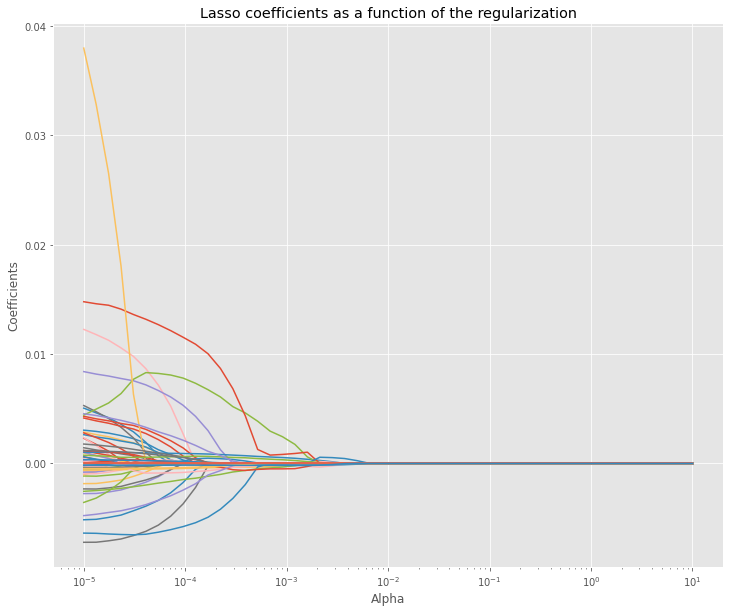

In [208]:
from sklearn.linear_model import Lasso

for a in alphas2:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(xsgtrain_enc, ysgtrain)
    coefs2.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas2, coefs2)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

#### SG Lasso Hyper-parameter Tuning

In [209]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_SG = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_SG.fit(xsgtrain_enc, ysgtrain)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

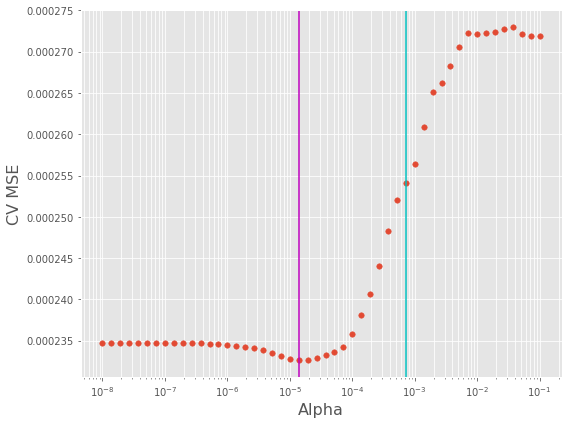

In [210]:
range_alpha = lasso_SG.cv_results_['param_alpha'].data
MSE_scores = lasso_SG.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_SG.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [211]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.0007196856730011514


#### SG Lasso Refit with One Standard Error Rule

In [212]:
lasso_SG = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_SG = lasso_SG.fit(xsgtrain_enc, ysgtrain)

print_metrics(lasso_SG, xsgtrain_enc, ysgtrain, xsgtest_enc, ysgtest, flag_log_sale_price = True)
print_metrics(lasso_SG, xsgtrain_enc, ysgtrain, xsgtest_enc, ysgtest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9692719214351483
Training MAE 0.01022163691753188
Training RMSE 0.015275969223577686
Test R2 0.9533470819305748
Test MAE 0.010963199031549811
Test RMSE 0.0162850243344106

Metrics for lasso:

Training R2 0.9635260410534686
Training MAE 0.011949616119838042
Training RMSE 0.023205461254386873
Test R2 0.949644043053083
Test MAE 0.012467818910120188
Test RMSE 0.019507235781229315


#### SG Recover Naive Least Squares

In [213]:
lasso.set_params(alpha=0)
lasso.fit(xsgtrain_enc, ysgtrain)
lasso.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [214]:
print_metrics(lasso, xsgtrain_enc, ysgtrain, xsgtest_enc, ysgtest, flag_log_sale_price = True)
print_metrics(lasso, xsgtrain_enc, ysgtrain, xsgtest_enc, ysgtest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9735158054616756
Training MAE 0.009855994360584062
Training RMSE 0.014181901253147746
Test R2 0.9581895015187321
Test MAE 0.010716010340144893
Test RMSE 0.015416709105254838

Metrics for lasso:

Training R2 0.9726399361492704
Training MAE 0.011403366074084162
Training RMSE 0.020098206593593786
Test R2 0.9554497341536242
Test MAE 0.012136886684138214
Test RMSE 0.0183482841188013


#### New Lasso Dataframe for SG

In [215]:
modelResult_SG = pd.DataFrame(data={'Model':['lassoSGtrain', 'lassoSGtest'], 'R2':[0.9735158054616756, 0.9581895015187321], 'RMSE':[0.014181901253147746, 0.015416709105254838], 'MAE':[0.009855994360584062, 0.010716010340144893]})
modelResult_SG

,Model,R2,RMSE,MAE
0,lassoSGtrain,0.973516,0.014182,0.009856
1,lassoSGtest,0.958190,0.015417,0.010716


### SF Lasso Regression

#### Categorical variables to Numberical variables for SF

In [216]:
# One Hot Encoder for sf categorical values to numerical  
sfdrop_enc = OneHotEncoder(drop='first').fit(xsftrain[['Pos', 'Tm']])

xsftrain_cat = sfdrop_enc.transform(xsftrain[['Pos', 'Tm']]).toarray()
xsftrain_num = xsftrain[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xsftrain_enc = np.concatenate((xsftrain_cat, xsftrain_num), axis = 1)

xsftest_cat = sfdrop_enc.transform(xsftest[['Pos', 'Tm']]).toarray()
xsftest_num = xsftest[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xsftest_enc = np.concatenate((xsftest_cat, xsftest_num), axis = 1)

#### Lasso Coefficients

In [217]:
alphas3 = np.logspace(-5, 1 , num=50, base=10)
coefs3 = []

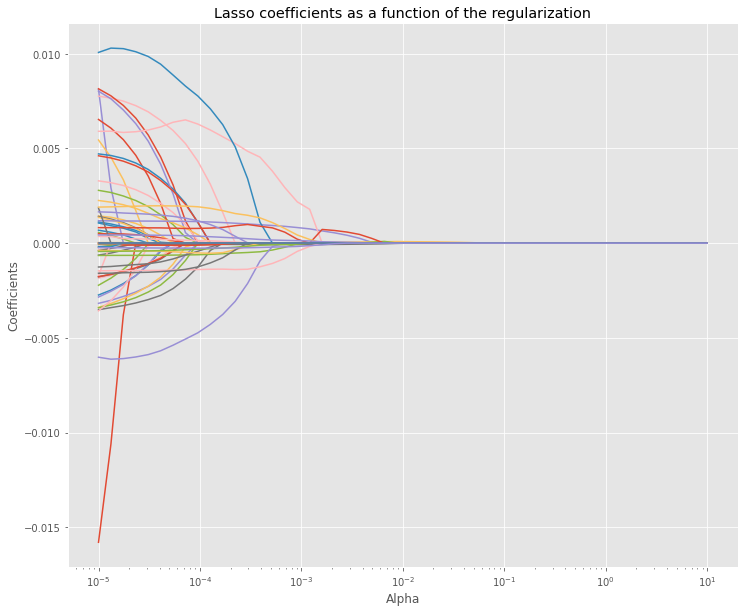

In [218]:
for a in alphas3:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(xsftrain_enc, ysftrain)
    coefs3.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas3, coefs3)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

#### SF Lasso Hyper-parameter Tuning

In [219]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_SF = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_SF.fit(xsftrain_enc, ysftrain)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

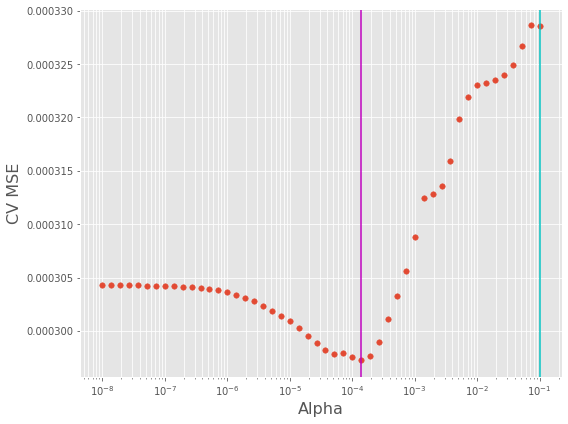

In [220]:
range_alpha = lasso_SF.cv_results_['param_alpha'].data
MSE_scores = lasso_SF.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_SF.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [221]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.1


#### SF Lasso Refit with One Standard Error Rule

In [222]:
lasso_SF = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_SF.fit(xsftrain_enc, ysftrain)

print_metrics(lasso_SF, xsftrain_enc, ysftrain, xsftest_enc, ysftest, flag_log_sale_price = True)
print_metrics(lasso_SF, xsftrain_enc, ysftrain, xsftest_enc, ysftest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9467290049089107
Training MAE 0.012038794222179508
Training RMSE 0.0179818279438835
Test R2 0.9518255084931406
Test MAE 0.0119171855921589
Test RMSE 0.017545801754825847

Metrics for lasso:

Training R2 0.9398311278338122
Training MAE 0.013691201039054053
Training RMSE 0.022198756351584692
Test R2 0.9463279546370836
Test MAE 0.013575868625047536
Test RMSE 0.02159747122201664


#### SF Recover Naive Least Squares

In [223]:
lasso.set_params(alpha=0)
lasso.fit(xsftrain_enc, ysftrain)
lasso.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [224]:
print_metrics(lasso, xsftrain_enc, ysftrain, xsftest_enc, ysftest, flag_log_sale_price = True)
print_metrics(lasso, xsftrain_enc, ysftrain, xsftest_enc, ysftest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9554751791933287
Training MAE 0.011154500109417353
Training RMSE 0.01643953477934113
Test R2 0.9570058328387345
Test MAE 0.011150829525200133
Test RMSE 0.016575606141497216

Metrics for lasso:

Training R2 0.9501938442825337
Training MAE 0.012622133818500985
Training RMSE 0.02019687697448164
Test R2 0.9520753537045011
Test MAE 0.01271307286127199
Test RMSE 0.02040836858165901


#### New Lasso Dataframe for SF

In [225]:
modelResult_SF = pd.DataFrame(data={'Model':['lassoSFtrain', 'lassoSFtest'], 'R2':[0.9554751791933287, 0.9570058328387345], 'RMSE':[0.01643953477934113, 0.016575606141497216], 'MAE':[0.011154500109417353, 0.011150829525200133]})
modelResult_SF

,Model,R2,RMSE,MAE
0,lassoSFtrain,0.955475,0.016440,0.011155
1,lassoSFtest,0.957006,0.016576,0.011151


### PF Lasso Regression

#### Categorical variables to Numberical variables for PF

In [226]:
# One Hot Encoder for pf categorical values to numerical 
pfdrop_enc = OneHotEncoder(drop='first').fit(xpftrain[['Pos', 'Tm']])

xpftrain_cat = pfdrop_enc.transform(xpftrain[['Pos', 'Tm']]).toarray()
xpftrain_num = xpftrain[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xpftrain_enc = np.concatenate((xpftrain_cat, xpftrain_num), axis = 1)

xpftest_cat = pfdrop_enc.transform(xpftest[['Pos', 'Tm']]).toarray()
xpftest_num = xpftest[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xpftest_enc = np.concatenate((xpftest_cat, xpftest_num), axis = 1)

#### Lasso Coefficients

In [227]:
alphas4 = np.logspace(-5, 1 , num=50, base=10)
coefs4 = []

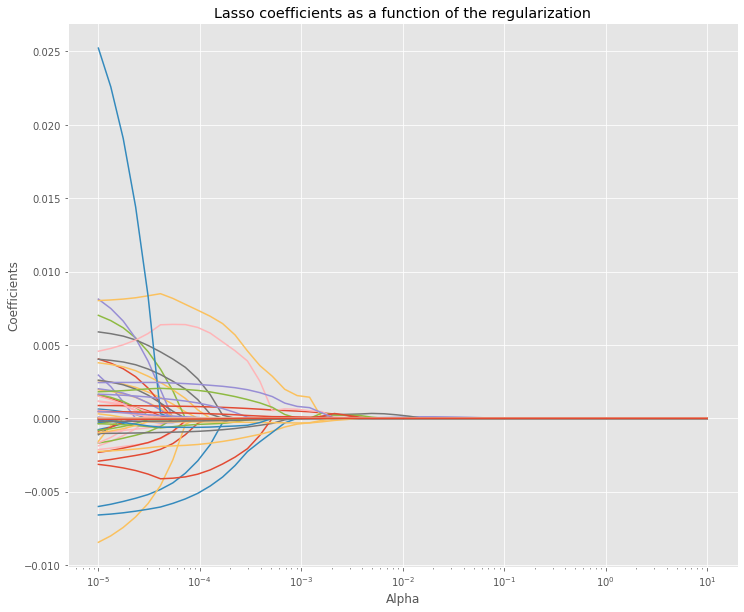

In [228]:
for a in alphas4:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(xpftrain_enc, ypftrain)
    coefs4.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas4, coefs4)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

#### PF Lasso Hyper-parameter Tuning

In [229]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_PF = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_PF.fit(xpftrain_enc, ypftrain)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

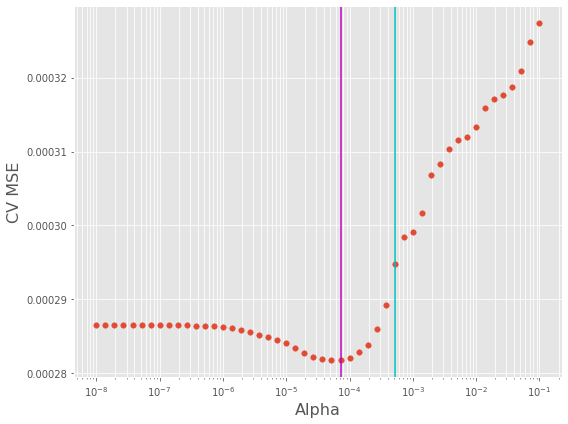

In [230]:
range_alpha = lasso_PF.cv_results_['param_alpha'].data
MSE_scores = lasso_PF.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_PF.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [231]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.0005179474679231213


#### PF Lasso Refit with One Standard Error Rule

In [232]:
lasso_PF = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_PF.fit(xpftrain_enc, ypftrain)

print_metrics(lasso_PF, xpftrain_enc, ypftrain, xpftest_enc, ypftest, flag_log_sale_price = True)
print_metrics(lasso_PF, xpftrain_enc, ypftrain, xpftest_enc, ypftest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9622703981582317
Training MAE 0.011918251407760306
Training RMSE 0.016937004922635623
Test R2 0.9662366265057079
Test MAE 0.01168026049304343
Test RMSE 0.01651632469777764

Metrics for lasso:

Training R2 0.9607171032282706
Training MAE 0.013634946362052666
Training RMSE 0.02058012670642586
Test R2 0.9664538806881527
Test MAE 0.013384949661374552
Test RMSE 0.019837741461705475


#### PF Recover Naive Least Squares

In [233]:
lasso.set_params(alpha=0)
lasso.fit(xpftrain_enc, ypftrain)
lasso.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [234]:
print_metrics(lasso, xpftrain_enc, ypftrain, xpftest_enc, ypftest, flag_log_sale_price = True)
print_metrics(lasso, xpftrain_enc, ypftrain, xpftest_enc, ypftest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9653762676155331
Training MAE 0.011491334462568987
Training RMSE 0.016224915507202932
Test R2 0.9658582179040359
Test MAE 0.011811117381433804
Test RMSE 0.016608621532896956

Metrics for lasso:

Training R2 0.9642249576976745
Training MAE 0.013117599625094413
Training RMSE 0.019639768729226802
Test R2 0.9665727209654734
Test MAE 0.013485867514273059
Test RMSE 0.01980257175522275


#### New Lasso Dataframe for PF

In [235]:
modelResult_PF = pd.DataFrame(data={'Model':['lassoPFtrain', 'lassoPFtest'], 'R2':[0.9653762676155331, 0.9658582179040359], 'RMSE':[0.016224915507202932, 0.016608621532896956], 'MAE':[0.011491334462568987, 0.011811117381433804]})
modelResult_PF

,Model,R2,RMSE,MAE
0,lassoPFtrain,0.965376,0.016225,0.011491
1,lassoPFtest,0.965858,0.016609,0.011811


### C Lasso Regression

#### Categorical variables to Numberical variables for C

In [236]:
# One Hot Encoder for center categorical values to numerical 
cdrop_enc = OneHotEncoder(drop='first').fit(xctrain[['Pos', 'Tm']])

xctrain_cat = cdrop_enc.transform(xctrain[['Pos', 'Tm']]).toarray()
xctrain_num = xctrain[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xctrain_enc = np.concatenate((xctrain_cat, xctrain_num), axis = 1)

xctest_cat = cdrop_enc.transform(xctest[['Pos', 'Tm']]).toarray()
xctest_num = xctest[['Season', 'G', 'GS', 'MP', 'FG', 'FGA', 'X2PM', 'X2PA', 'X2PP', 'TRB', 'eFG', 'PER', 'BPM', 'OBPM', 'DBPM', 'VORP', 'WS', 'WS48', 'ORBP', 'DRBP', 'TRBP', 'ASTP', 'STLP', 'BLKP', 'TOVP', 'Salary', 'SalaryIn', 'Cap', 'Experience']].values
xctest_enc = np.concatenate((xctest_cat, xctest_num), axis = 1)

#### Lasso Coefficients

In [237]:
alphas5 = np.logspace(-5, 1 , num=50, base=10)
coefs5 = []

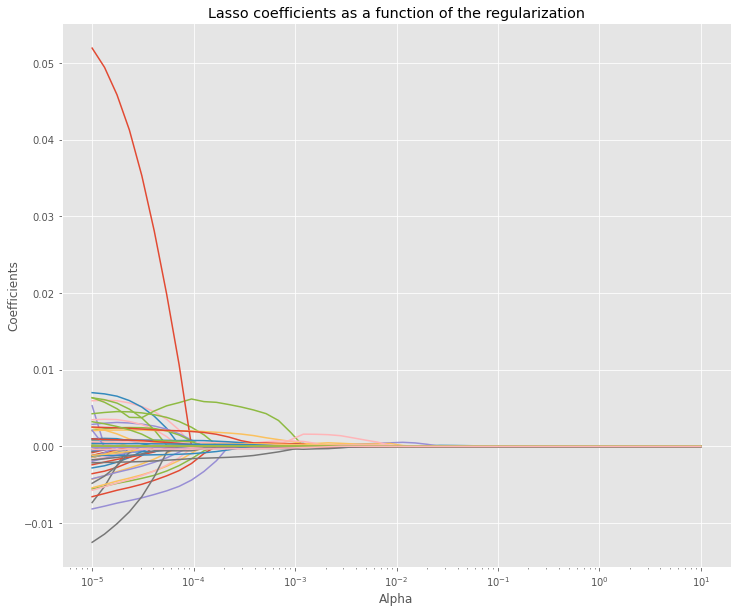

In [238]:
for a in alphas5:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(xctrain_enc, yctrain)
    coefs5.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas5, coefs5)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

#### C Lasso Hyper-parameter Tuning

In [239]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_C = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_C.fit(xctrain_enc, yctrain)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

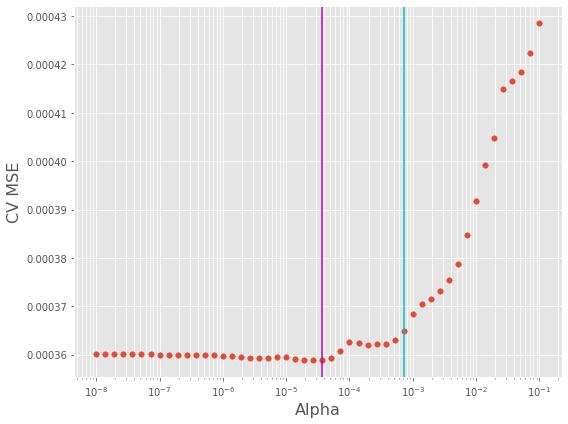

In [240]:
range_alpha = lasso_C.cv_results_['param_alpha'].data
MSE_scores = lasso_C.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_C.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [241]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.0007196856730011514


#### C Lasso Refit with One Standard Error Rule

In [242]:
lasso_C = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_C.fit(xctrain_enc, yctrain)

print_metrics(lasso_C, xctrain_enc, yctrain, xctest_enc, yctest, flag_log_sale_price = True)
print_metrics(lasso_C, xctrain_enc, yctrain, xctest_enc, yctest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.9604654616722428
Training MAE 0.013229556878578498
Training RMSE 0.018747247016716904
Test R2 0.958282670180658
Test MAE 0.013490620507226627
Test RMSE 0.018582576081944843

Metrics for lasso:

Training R2 0.9578085021565483
Training MAE 0.01540663927618213
Training RMSE 0.023792610806319593
Test R2 0.957380307411369
Test MAE 0.015515211684724818
Test RMSE 0.022640091471670114


#### C Recover Naive Least Squares

In [243]:
lasso.set_params(alpha=0)
lasso.fit(xctrain_enc, yctrain)
lasso.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [244]:
print_metrics(lasso, xctrain_enc, yctrain, xctest_enc, yctest, flag_log_sale_price = True)
print_metrics(lasso, xctrain_enc, yctrain, xctest_enc, yctest, flag_log_sale_price = False)


Metrics for Log(lasso):

Training R2 0.96316938717211
Training MAE 0.012779188850983919
Training RMSE 0.018094793803944374
Test R2 0.9607796123729158
Test MAE 0.013134156738149253
Test RMSE 0.018017876629096593

Metrics for lasso:

Training R2 0.9611143741894556
Training MAE 0.014842340065979162
Training RMSE 0.022841476571279114
Test R2 0.9605193953289729
Test MAE 0.015042516011186202
Test RMSE 0.021790385749665377


#### New Lasso Dataframe for C

In [245]:
modelResult_C = pd.DataFrame(data={'Model':['lassoCtrain', 'lassoCtest'], 'R2':[0.96316938717211, 0.9607796123729158], 'RMSE':[0.018094793803944374, 0.018017876629096593], 'MAE':[0.012779188850983919, 0.013134156738149253]})
modelResult_C

,Model,R2,RMSE,MAE
0,lassoCtrain,0.963169,0.018095,0.012779
1,lassoCtest,0.960780,0.018018,0.013134


### 4-2) Ridge Regression

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#### Feature Engineering and Selection for Ridge

In [247]:
#Filter by Position
pg= nba.loc[nba['Pos'].isin(['PG','PG-SG',"SG-PG", "PG-SF"])]
pg= pg[['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'Experience', 'pCap']]
sg= nba.loc[nba['Pos'].isin(["SG","SF-SG","SG-PG", "SG-PF", "PG-SG","SG-SF"])]
sg= sg[['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'Experience', 'pCap']]
sf= nba.loc[nba['Pos'].isin(["SF","PG-SF","PF-SF","SF-SG","SF-PF","SG-SF","SF-C" ])]
sf= sf[['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'Experience', 'pCap']]
pf= nba.loc[nba['Pos'].isin(["PF","SF-PF","PF-SF","PF-C","C-PF"])]
pf= pf[['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'Experience', 'pCap']]
c = nba.loc[nba['Pos'].isin(["C","C-PF","PF-C","SF-C"])]
c = c[['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS', 'DWS', 'Experience', 'pCap']]

#### Train and Test Split Data by Position

In [248]:
pg_train, pg_test = train_test_split(pg, test_size=0.25, random_state=123)
sg_train, sg_test = train_test_split(sg, test_size=0.25, random_state=123)
sf_train, sf_test = train_test_split(sf, test_size=0.25, random_state=123)
pf_train, pf_test = train_test_split(pf, test_size=0.25, random_state=123)
c_train, c_test = train_test_split(c, test_size=0.25, random_state=123)

pg_test

,FGP,X3PM,X3PA,X3PP,FTM,FTA,FTP,ORB,DRB,AST,...,PF,PTS,TS,X3PAr,FTr,USG,OWS,DWS,Experience,pCap
2671,0.419,0.9,2.8,0.327,3.1,4.0,0.780,0.5,3.6,4.1,...,2.6,13.8,0.514,0.241,0.340,24.4,-1.4,2.8,1,0.081183
6179,0.386,0.0,0.3,0.150,0.7,1.0,0.779,0.2,1.5,2.7,...,1.8,3.8,0.440,0.072,0.245,14.0,-0.5,0.4,6,0.018560
8281,0.422,0.3,1.1,0.308,1.5,1.9,0.801,0.5,1.4,2.7,...,2.1,6.2,0.520,0.217,0.372,19.8,1.7,2.4,5,0.010121
2222,0.406,0.3,1.2,0.294,0.4,0.5,0.800,0.1,0.8,1.4,...,0.6,3.7,0.441,0.496,0.035,22.9,-0.5,0.4,10,0.069135
5085,0.392,0.0,0.2,0.125,0.6,0.8,0.688,0.4,1.3,3.3,...,1.9,4.3,0.423,0.044,0.177,15.3,-0.3,0.3,9,0.067752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,0.387,0.5,1.5,0.349,0.1,0.2,0.667,0.3,1.4,1.4,...,0.9,3.5,0.467,0.418,0.057,15.9,-0.1,0.7,12,0.025577
3972,0.423,2.2,5.2,0.425,1.0,1.2,0.808,0.6,5.0,9.1,...,1.8,10.3,0.577,0.617,0.148,14.5,4.8,4.0,16,0.138648
9420,0.453,1.0,2.8,0.358,0.9,1.0,0.833,0.2,0.8,3.3,...,1.4,6.5,0.583,0.547,0.203,19.6,1.1,0.5,5,0.077675
5890,0.475,0.8,2.2,0.367,0.9,1.1,0.797,0.5,1.6,2.0,...,2.0,7.0,0.575,0.393,0.195,18.9,1.2,0.6,1,0.019831


#### Helper Function for Ridge

In [249]:
def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):
        
        y_pred_train = pd.Series(model.predict(X_train)).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).reset_index(drop=True)
        y_train = y_train.copy().reset_index(drop=True)
        y_test = y_test.copy().reset_index(drop=True)
        
        print("\nMetrics for Log(Ridge):\n")
        
    elif (flag_log_sale_price == False):
        
        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp).reset_index(drop=True)
        y_train = y_train.copy().apply(np.exp).reset_index(drop=True)
        y_test = y_test.copy().apply(np.exp).reset_index(drop=True)
        
        print("\nMetrics for Ridge:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))
    print('Training RMSE', RMSE(y_train, y_pred_train))

    print('Test R2', OSR2(y_test, y_test, y_pred_test))
    print('Test MAE', MAE(y_test, y_pred_test))
    print('Test RMSE', RMSE(y_test, y_pred_test))
    
    return None

### PG Ridge Regression

In [250]:
# Split all Point Guard position data into train_x train_y test_x test_y.
pg_train_x = pg_train.drop(['pCap'], axis=1)
pg_train_y = pg_train['pCap']
pg_test_x = pg_test.drop(['pCap'], axis=1)
pg_test_y = pg_test['pCap']

In [251]:
features = np.arange(1,23)
highest = 0

i = 0
scores = []

for n in range(len(features)):
    
    model = LinearRegression()
    rfe = RFE(model, features[n])
    pg_train_rfe = rfe.fit_transform(pg_train_x, pg_train_y)
    pg_test_rfe = rfe.transform(pg_test_x)
    model.fit(pg_train_rfe, pg_train_y)
    score = model.score(pg_test_rfe, pg_test_y)
    scores.append(score)
    if(score > highest):
        highest = score
        i = features[n]
        
print("Optimum number of features: %d" %i)
print("Score with %d features: %f" % (i, highest))

cols = list(pg_train_x.columns)
model = LinearRegression()
rfe = RFE(model, 20)

pg_train_rfe = rfe.fit_transform(pg_train_x, pg_train_y)

model.fit(pg_train_rfe, pg_train_y)
temp = pd.Series(rfe.support_,index = cols)
selected_features = temp[temp==True].index
print(selected_features)

Optimum number of features: 20
Score with 20 features: 0.532810
Index(['FGP', 'X3PM', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS',
       'Experience'],
      dtype='object')


In [252]:
features_pg = ['FGP', 'X3PM', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'USG', 'OWS','Experience']

pg_train_x = pg_train_x[features_pg]
pg_test_x = pg_test_x[features_pg]

#### Determine best alpha for PG

In [253]:
# Initial Ridge Regression For Point Guards
# Optimizing Ridge Parameters
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
best_mse = 999999999
best_alpha = 0

for i in range(0, len(alphas)):
    rmodel = Ridge(alpha=alphas[i], fit_intercept=True)
    rmodel.fit(pg_train_x, pg_train_y)
    r_mse = mean_squared_error(pg_train_y, rmodel.predict(pg_train_x))
    if (r_mse < best_mse):
        best_mse = r_mse
        best_alpha = alphas[i]

alpha_best = best_alpha
print(alpha_best)

0.001


#### Ridge Visualization alpha and coeff for PG

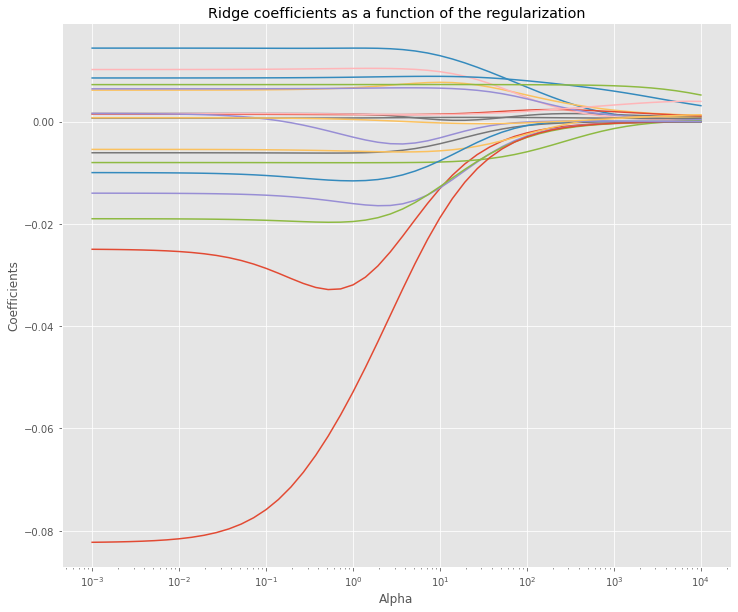

In [254]:
alpha_grid1 = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
coefs1 = []

for a in alpha_grid1:
    rmodel = Ridge(alpha=a, fit_intercept=True, random_state=88)
    rmodel.fit(pg_train_x, pg_train_y)
    coefs1.append(rmodel.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid1, coefs1)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [255]:
ridgereg_pg = Ridge(alpha=0.001,normalize=True, max_iter=1e5, )
ridgereg_pg.fit(pg_train_x,pg_train_y)

Ridge(alpha=0.001, max_iter=100000.0, normalize=True)

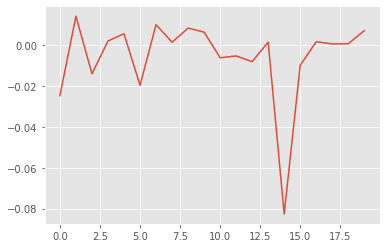

In [256]:
plt.plot(ridgereg_pg.coef_)
plt.show()

#### Evaluate Ridge model performance for PG

In [257]:
print_metrics(ridgereg_pg, pg_train_x, pg_train_y, pg_test_x, pg_test_y, flag_log_sale_price = True)
print_metrics(ridgereg_pg, pg_train_x, pg_train_y, pg_test_x, pg_test_y, flag_log_sale_price = False)


Metrics for Log(Ridge):

Training R2 0.5479140330069059
Training MAE 0.0361465825296435
Training RMSE 0.04953289749495079
Test R2 0.5329779344481199
Test MAE 0.03737760874742202
Test RMSE 0.050772434388964116

Metrics for Ridge:

Training R2 0.5425457076404991
Training MAE 0.040292677494599465
Training RMSE 0.057401216202506614
Test R2 0.5313494467288443
Test MAE 0.04175783693144077
Test RMSE 0.05848858939788267


#### New Ridge Dataframe for PG

In [258]:
modelResult_PG.loc[2, 'Model'] = 'ridgePGtrain'
modelResult_PG.loc[2, 'R2'] = 0.5479140330069059
modelResult_PG.loc[2, 'RMSE'] = 0.0361465825296435
modelResult_PG.loc[2, 'MAE'] = 0.04953289749495079
modelResult_PG.loc[3, 'Model'] = 'ridgePGtest'
modelResult_PG.loc[3, 'R2'] = 0.5329779344481199
modelResult_PG.loc[3, 'RMSE'] = 0.03737760874742202
modelResult_PG.loc[3, 'MAE'] = 0.050772434388964116
modelResult_PG

,Model,R2,RMSE,MAE
0,lassoPGtrain,0.966388,0.013506,0.009597
1,lassoPGtest,0.961698,0.014540,0.010290
2,ridgePGtrain,0.547914,0.036147,0.049533
3,ridgePGtest,0.532978,0.037378,0.050772


### SG Ridge Regression

In [259]:
# Split all Shooting Guard position data into train_x train_y test_x test_y.
sg_train_x = sg_train.drop(['pCap'], axis=1)
sg_train_y = sg_train['pCap']
sg_test_x = sg_test.drop(['pCap'], axis=1)
sg_test_y = sg_test['pCap']

In [260]:
features = np.arange(1,43)
highest = 0

i = 0
scores = []

for n in range(len(features)):
    
    model = LinearRegression()
    rfe = RFE(model, features[n])
    sg_train_rfe = rfe.fit_transform(sg_train_x, sg_train_y)
    sg_test_rfe = rfe.transform(sg_test_x)
    model.fit(sg_train_rfe, sg_train_y)
    score = model.score(sg_test_rfe, sg_test_y)
    scores.append(score)
    if(score > highest):
        highest = score
        i = features[n]
        
print("Optimum number of features: %d" %i)
print("Score with %d features: %f" % (i, highest))

cols = list(sg_train_x.columns)
model = LinearRegression()
rfe = RFE(model, 17)

sg_train_rfe = rfe.fit_transform(sg_train_x, sg_train_y)

model.fit(sg_train_rfe, sg_train_y)
temp = pd.Series(rfe.support_,index = cols)
selected_features = temp[temp==True].index
print(selected_features)

Optimum number of features: 17
Score with 17 features: 0.526211
Index(['FGP', 'X3PA', 'FTM', 'FTA', 'FTP', 'DRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'TS', 'FTr', 'OWS', 'DWS', 'Experience'],
      dtype='object')


In [261]:
features_sg = ['FGP', 'X3PA', 'FTM', 'FTA', 'FTP', 'DRB', 'AST', 'STL', 'BLK', 'TOV','PF', 'PTS', 'TS', 'FTr', 'OWS', 'DWS', 'Experience']

sg_train_x = sg_train_x[features_sg]
sg_test_x = sg_test_x[features_sg]

#### Determine best alpha for SG

In [262]:
# Initial Ridge Regression For Shooting Guards
# Optimizing Ridge Parameters
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
best_mse = 999999999
best_alpha = 0

for i in range(0, len(alphas)):
    rmodel = Ridge(alpha=alphas[i], fit_intercept=True)
    rmodel.fit(sg_train_x, sg_train_y)
    r_mse = mean_squared_error(sg_train_y, rmodel.predict(sg_train_x))
    if (r_mse < best_mse):
        best_mse = r_mse
        best_alpha = alphas[i]

alpha_best = best_alpha
print(alpha_best)

0.001


In [263]:
# Initial Ridge Regression For Shooting Guards
# Optimizing Ridge Parameters
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
best_mse = 999999999
best_alpha = 0

for i in range(0, len(alphas)):
    rmodel = Ridge(alpha=alphas[i], fit_intercept=True)
    rmodel.fit(sg_train_x, sg_train_y)
    r_mse = mean_squared_error(sg_train_y, rmodel.predict(sg_train_x))
    if (r_mse < best_mse):
        best_mse = r_mse
        best_alpha = alphas[i]

alpha_best = best_alpha
print(alpha_best)

0.001


#### Ridge Visualization alpha and coeff for SG

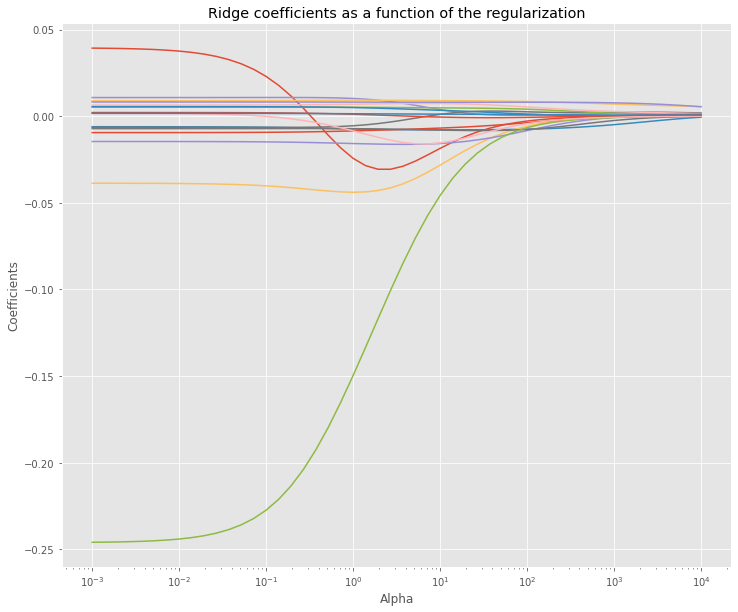

In [264]:
alpha_grid2 = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
coefs2 = []

for a in alpha_grid2:
    rmodel = Ridge(alpha=a, fit_intercept=True, random_state=88)
    rmodel.fit(sg_train_x, sg_train_y)
    coefs2.append(rmodel.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid2, coefs2)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [265]:
ridgereg_sg = Ridge(alpha=0.001,normalize=True, max_iter=1e5, )
ridgereg_sg.fit(sg_train_x,sg_train_y)

Ridge(alpha=0.001, max_iter=100000.0, normalize=True)

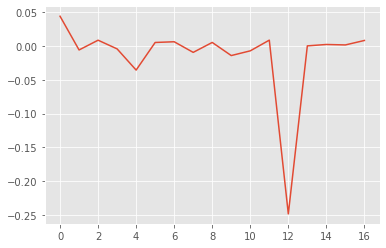

In [266]:
plt.plot(ridgereg_sg.coef_)
plt.show()

#### Evaluate Ridge model performance for SG

In [267]:
print_metrics(ridgereg_sg, sg_train_x, sg_train_y, sg_test_x, sg_test_y, flag_log_sale_price = True)
print_metrics(ridgereg_sg, sg_train_x, sg_train_y, sg_test_x, sg_test_y, flag_log_sale_price = False)


Metrics for Log(Ridge):

Training R2 0.5162726443749371
Training MAE 0.037624553849053395
Training RMSE 0.06060959702850034
Test R2 0.5265161252143797
Test MAE 0.03836756872444901
Test RMSE 0.051880195226677375

Metrics for Ridge:

Training R2 0.3992769615862982
Training MAE 0.04341155566520186
Training RMSE 0.09417505809981484
Test R2 0.5304995100170671
Test MAE 0.042844250040196326
Test RMSE 0.05956461395258389


#### New Ridge Dataframe for SG

In [268]:
modelResult_SG.loc[2, 'Model'] = 'ridgeSGtrain'
modelResult_SG.loc[2, 'R2'] = 0.5162726443749371
modelResult_SG.loc[2, 'RMSE'] = 0.037624553849053395
modelResult_SG.loc[2, 'MAE'] = 0.06060959702850034
modelResult_SG.loc[3, 'Model'] = 'ridgeSGtest'
modelResult_SG.loc[3, 'R2'] = 0.5265161252143797
modelResult_SG.loc[3, 'RMSE'] = 0.03836756872444901
modelResult_SG.loc[3, 'MAE'] = 0.051880195226677375
modelResult_SG

,Model,R2,RMSE,MAE
0,lassoSGtrain,0.973516,0.014182,0.009856
1,lassoSGtest,0.958190,0.015417,0.010716
2,ridgeSGtrain,0.516273,0.037625,0.060610
3,ridgeSGtest,0.526516,0.038368,0.051880


### SF Ridge Regression

In [269]:
# Split all Small Forward position data into train_x train_y test_x test_y.
sf_train_x = sf_train.drop(['pCap'], axis=1)
sf_train_y = sf_train['pCap']
sf_test_x = sf_test.drop(['pCap'], axis=1)
sf_test_y = sf_test['pCap']

In [270]:
features = np.arange(1,43)
highest = 0

i = 0
scores = []

for n in range(len(features)):
    
    model = LinearRegression()
    rfe = RFE(model, features[n])
    sf_train_rfe = rfe.fit_transform(sf_train_x, sf_train_y)
    sf_test_rfe = rfe.transform(sf_test_x)
    model.fit(sf_train_rfe, sf_train_y)
    score = model.score(sf_test_rfe, sf_test_y)
    scores.append(score)
    if(score > highest):
        highest = score
        i = features[n]
        
print("Optimum number of features: %d" %i)
print("Score with %d features: %f" % (i, highest))

cols = list(sf_train_x.columns)
model = LinearRegression()
rfe = RFE(model, 12)

sf_train_rfe = rfe.fit_transform(sf_train_x, sf_train_y)

model.fit(sf_train_rfe, sf_train_y)
temp = pd.Series(rfe.support_,index = cols)
selected_features = temp[temp==True].index
print(selected_features)

Optimum number of features: 12
Score with 12 features: 0.525800
Index(['FGP', 'FTM', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'TOV', 'PF', 'TS',
       'X3PAr', 'Experience'],
      dtype='object')


In [271]:
features_sf = ['FGP', 'FTM', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'TOV', 'PF', 'TS','X3PAr', 'Experience']

sf_train_x = sf_train_x[features_sf]
sf_test_x = sf_test_x[features_sf]

#### Determine best alpha for SF

In [272]:
# Initial Ridge Regression For Small Forwards
# Optimizing Ridge Parameters
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
best_mse = 999999999
best_alpha = 0

for i in range(0, len(alphas)):
    rmodel = Ridge(alpha=alphas[i], fit_intercept=True)
    rmodel.fit(sf_train_x, sf_train_y)
    r_mse = mean_squared_error(sf_train_y, rmodel.predict(sf_train_x))
    if (r_mse < best_mse):
        best_mse = r_mse
        best_alpha = alphas[i]

alpha_best = best_alpha
print(alpha_best)

0.001


#### Ridge Visualization alpha and coeff for SF

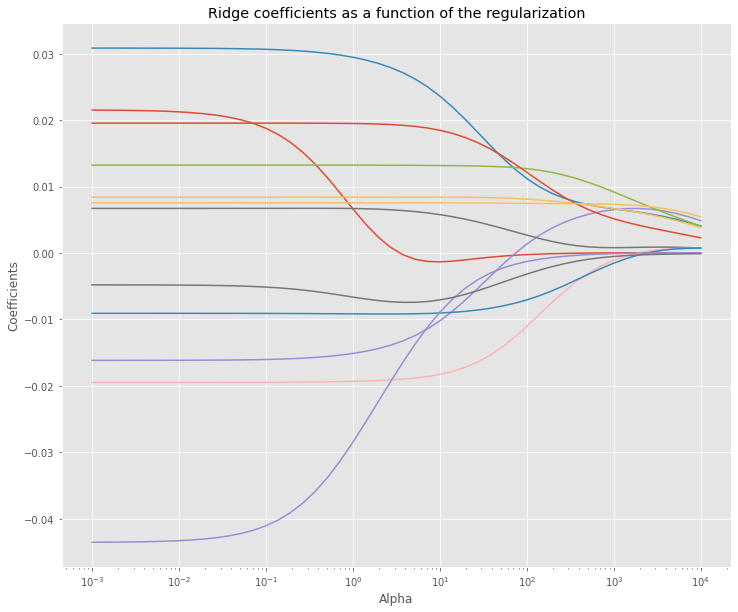

In [273]:
alpha_grid3 = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
coefs3 = []

for a in alpha_grid3:
    rmodel = Ridge(alpha=a, fit_intercept=True, random_state=88)
    rmodel.fit(sf_train_x, sf_train_y)
    coefs3.append(rmodel.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid3, coefs3)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [274]:
ridgereg_sf = Ridge(alpha=0.001,normalize=True, max_iter=1e5, )
ridgereg_sf.fit(sf_train_x,sf_train_y)

Ridge(alpha=0.001, max_iter=100000.0, normalize=True)

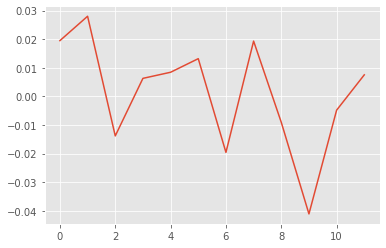

In [275]:
plt.plot(ridgereg_sf.coef_)
plt.show()

#### Evaluate Ridge model performance for SF

In [276]:
print_metrics(ridgereg_sf, sf_train_x, sf_train_y, sf_test_x, sf_test_y, flag_log_sale_price = True)
print_metrics(ridgereg_sf, sf_train_x, sf_train_y, sf_test_x, sf_test_y, flag_log_sale_price = False)


Metrics for Log(Ridge):

Training R2 0.5122464413710153
Training MAE 0.03873642848409298
Training RMSE 0.054411244157283
Test R2 0.5258665430934257
Test MAE 0.038664403896352215
Test RMSE 0.05504462907083943

Metrics for Ridge:

Training R2 0.5015464813038555
Training MAE 0.04359441153580185
Training RMSE 0.06389325920073617
Test R2 0.5173117295801839
Test MAE 0.04355471527874919
Test RMSE 0.06476825609637153


#### New Ridge Dataframe for SF

In [277]:
modelResult_SF.loc[2, 'Model'] = 'ridgeSFtrain'
modelResult_SF.loc[2, 'R2'] = 0.5122464413710153
modelResult_SF.loc[2, 'RMSE'] = 0.03873642848409298
modelResult_SF.loc[2, 'MAE'] = 0.054411244157283
modelResult_SF.loc[3, 'Model'] = 'ridgeSFtest'
modelResult_SF.loc[3, 'R2'] = 0.5258665430934257
modelResult_SF.loc[3, 'RMSE'] = 0.03836756872444901
modelResult_SF.loc[3, 'MAE'] = 0.05504462907083943
modelResult_SF

,Model,R2,RMSE,MAE
0,lassoSFtrain,0.955475,0.016440,0.011155
1,lassoSFtest,0.957006,0.016576,0.011151
2,ridgeSFtrain,0.512246,0.038736,0.054411
3,ridgeSFtest,0.525867,0.038368,0.055045


### PF Ridge Regression

In [278]:
# Split all Power Forward position data into train_x train_y test_x test_y.
pf_train_x = pf_train.drop(['pCap'], axis=1)
pf_train_y = pf_train['pCap']
pf_test_x = pf_test.drop(['pCap'], axis=1)
pf_test_y = pf_test['pCap']

pf_train_x

,FGP,X3PM,X3PA,X3PP,FTM,FTA,FTP,ORB,DRB,AST,...,TOV,PF,PTS,TS,X3PAr,FTr,USG,OWS,DWS,Experience
500,0.466,1.1,3.2,0.333,2.2,2.6,0.834,0.7,3.8,3.4,...,1.5,1.4,11.5,0.575,0.364,0.294,19.0,2.6,2.3,8
6308,0.406,0.0,0.0,0.000,1.1,2.0,0.561,2.1,3.4,0.4,...,0.9,2.3,2.9,0.471,0.018,0.897,10.7,0.7,1.1,2
3153,0.412,0.6,2.1,0.268,2.1,3.0,0.697,1.2,3.5,0.6,...,1.2,1.4,8.8,0.499,0.277,0.392,20.7,0.6,1.2,1
9771,0.479,0.0,0.0,0.000,1.0,1.3,0.729,3.7,3.8,1.2,...,1.2,3.0,5.8,0.515,0.002,0.263,13.1,2.1,1.6,0
1331,0.451,0.7,1.8,0.407,0.9,1.2,0.750,0.7,2.3,0.5,...,0.5,1.0,4.9,0.592,0.504,0.339,14.6,1.2,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,0.383,0.4,1.2,0.356,0.4,0.5,0.722,0.4,1.2,0.7,...,0.7,1.8,2.9,0.491,0.451,0.187,12.7,-0.4,0.7,4
9940,0.435,0.0,0.1,0.500,1.5,1.8,0.811,0.5,1.4,0.6,...,0.7,1.3,6.6,0.497,0.017,0.307,28.5,0.1,0.3,1
8240,0.452,0.0,0.0,0.333,3.3,4.2,0.776,2.3,3.3,1.0,...,2.0,3.9,10.2,0.537,0.005,0.555,23.1,1.5,0.4,0
5261,0.414,1.8,4.7,0.382,1.3,1.9,0.708,0.8,4.1,2.3,...,1.4,3.0,11.0,0.532,0.492,0.199,20.1,1.6,2.3,10


In [279]:
features = np.arange(1,23)
highest = 0

i = 0
scores = []

for n in range(len(features)):
    
    model = LinearRegression()
    rfe = RFE(model, features[n])
    pf_train_rfe = rfe.fit_transform(pf_train_x, pf_train_y)
    pf_test_rfe = rfe.transform(pf_test_x)
    model.fit(pf_train_rfe, pf_train_y)
    score = model.score(pf_test_rfe, pf_test_y)
    scores.append(score)
    if(score > highest):
        highest = score
        i = features[n]
        
print("Optimum number of features: %d" %i)
print("Score with %d features: %f" % (i, highest))

cols = list(pf_train_x.columns)
model = LinearRegression()
rfe = RFE(model, 17)

pf_train_rfe = rfe.fit_transform(pf_train_x, pf_train_y)

model.fit(pf_train_rfe, pf_train_y)
temp = pd.Series(rfe.support_,index = cols)
selected_features = temp[temp==True].index
print(selected_features)

Optimum number of features: 17
Score with 17 features: 0.572379
Index(['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'AST', 'BLK',
       'PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'DWS', 'Experience'],
      dtype='object')


In [280]:
features_pf = ['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'FTP', 'ORB', 'AST', 'BLK','PF', 'PTS', 'TS', 'X3PAr', 'FTr', 'DWS', 'Experience']

pf_train_x = pf_train_x[features_pf]
pf_test_x = pf_test_x[features_pf]

#### Determine best alpha for PF

In [281]:
# Initial Ridge Regression For Power Forwards
# Optimizing Ridge Parameters
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
best_mse = 999999999
best_alpha = 0

for i in range(0, len(alphas)):
    rmodel = Ridge(alpha=alphas[i], fit_intercept=True)
    rmodel.fit(pf_train_x, pf_train_y)
    r_mse = mean_squared_error(pf_train_y, rmodel.predict(pf_train_x))
    if (r_mse < best_mse):
        best_mse = r_mse
        best_alpha = alphas[i]

alpha_best = best_alpha
print(alpha_best)

0.001


#### Ridge Visualization alpha and coeff for PF

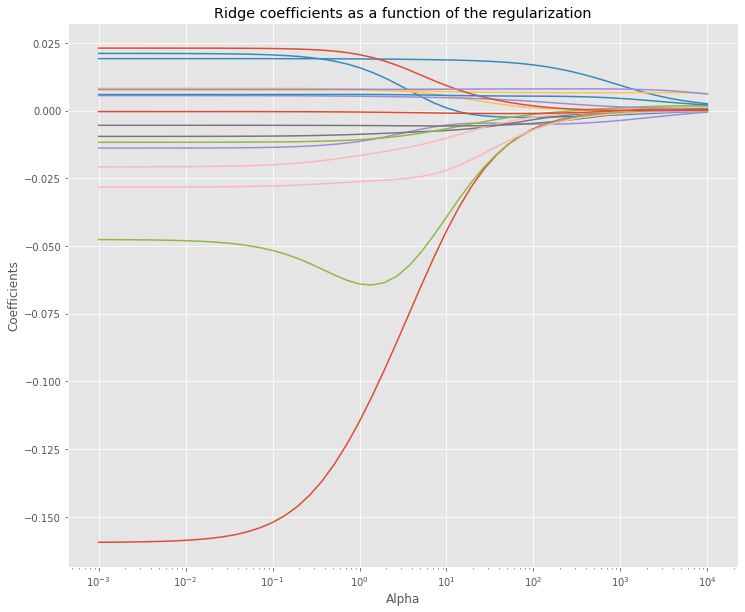

In [282]:
alpha_grid4 = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
coefs4 = []

for a in alpha_grid4:
    rmodel = Ridge(alpha=a, fit_intercept=True, random_state=88)
    rmodel.fit(pf_train_x, pf_train_y)
    coefs4.append(rmodel.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid4, coefs4)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [283]:
ridgereg_pf = Ridge(alpha=0.001,normalize=True, max_iter=1e5, )
ridgereg_pf.fit(pf_train_x,pf_train_y)

Ridge(alpha=0.001, max_iter=100000.0, normalize=True)

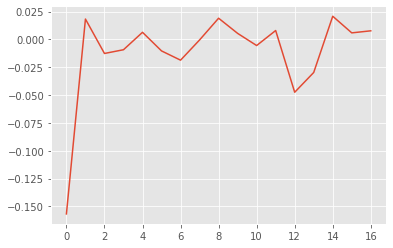

In [284]:
plt.plot(ridgereg_pf.coef_)
plt.show()

#### Evaluate Ridge model performance for PF

In [285]:
print_metrics(ridgereg_pf, pf_train_x, pf_train_y, pf_test_x, pf_test_y, flag_log_sale_price = True)
print_metrics(ridgereg_pf, pf_train_x, pf_train_y, pf_test_x, pf_test_y, flag_log_sale_price = False)


Metrics for Log(Ridge):

Training R2 0.564712767374989
Training MAE 0.04013843989759415
Training RMSE 0.057528555219271214
Test R2 0.5718906692628974
Test MAE 0.041045145412850155
Test RMSE 0.058812256465085484

Metrics for Ridge:

Training R2 0.5514048973658352
Training MAE 0.04582303800053021
Training RMSE 0.06954622406296787
Test R2 0.56281822150129
Test MAE 0.0471260444690036
Test RMSE 0.07161468872025648


#### New Ridge Dataframe for PF

In [286]:
modelResult_PF.loc[2, 'Model'] = 'ridgePFtrain'
modelResult_PF.loc[2, 'R2'] = 0.564712767374989
modelResult_PF.loc[2, 'RMSE'] = 0.04013843989759415
modelResult_PF.loc[2, 'MAE'] = 0.057528555219271214
modelResult_PF.loc[3, 'Model'] = 'ridgePFtest'
modelResult_PF.loc[3, 'R2'] = 0.5718906692628974 
modelResult_PF.loc[3, 'RMSE'] = 0.041045145412850155
modelResult_PF.loc[3, 'MAE'] = 0.058812256465085484
modelResult_PF

,Model,R2,RMSE,MAE
0,lassoPFtrain,0.965376,0.016225,0.011491
1,lassoPFtest,0.965858,0.016609,0.011811
2,ridgePFtrain,0.564713,0.040138,0.057529
3,ridgePFtest,0.571891,0.041045,0.058812


### C Ridge Regression

In [287]:
# Split all Center position data into train_x train_y test_x test_y.
c_train_x = c_train.drop(['pCap'], axis=1)
c_train_y = c_train['pCap']
c_test_x = c_test.drop(['pCap'], axis=1)
c_test_y = c_test['pCap']

In [288]:
features = np.arange(1,43)
highest = 0

i = 0
scores = []

for n in range(len(features)):
    
    model = LinearRegression()
    rfe = RFE(model, features[n])
    c_train_rfe = rfe.fit_transform(c_train_x, c_train_y)
    c_test_rfe = rfe.transform(c_test_x)
    model.fit(c_train_rfe, c_train_y)
    score = model.score(c_test_rfe, c_test_y)
    scores.append(score)
    if(score > highest):
        highest = score
        i = features[n]
        
print("Optimum number of features: %d" %i)
print("Score with %d features: %f" % (i, highest))

cols = list(c_train_x.columns)
model = LinearRegression()
rfe = RFE(model, 13)

c_train_rfe = rfe.fit_transform(c_train_x, c_train_y)

model.fit(c_train_rfe, c_train_y)
temp = pd.Series(rfe.support_,index = cols)
selected_features = temp[temp==True].index
print(selected_features)

Optimum number of features: 13
Score with 13 features: 0.561749
Index(['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'AST', 'STL', 'BLK', 'TS',
       'X3PAr', 'FTr', 'Experience'],
      dtype='object')


In [289]:
features_c = ['FGP', 'X3PM', 'X3PA', 'X3PP', 'FTM', 'FTA', 'AST', 'STL', 'BLK', 'TS','X3PAr', 'FTr', 'Experience']

c_train_x = c_train_x[features_c]
c_test_x = c_test_x[features_c]

#### Determine best alpha for C

In [290]:
# Initial Ridge Regression For Centers
# Optimizing Ridge Parameters
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
best_mse = 999999999
best_alpha = 0

for i in range(0, len(alphas)):
    rmodel = Ridge(alpha=alphas[i], fit_intercept=True)
    rmodel.fit(c_train_x, c_train_y)
    r_mse = mean_squared_error(c_train_y, rmodel.predict(c_train_x))
    if (r_mse < best_mse):
        best_mse = r_mse
        best_alpha = alphas[i]

alpha_best = best_alpha
print(alpha_best)

0.001


#### Ridge Visualization alpha and coeff for C

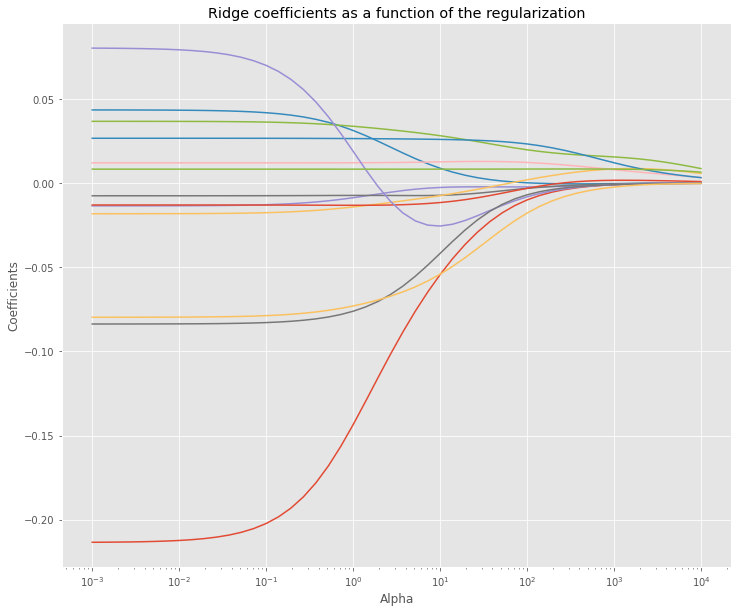

In [291]:
alpha_grid5 = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
coefs5 = []

for a in alpha_grid5:
    rmodel = Ridge(alpha=a, fit_intercept=True, random_state=88)
    rmodel.fit(c_train_x, c_train_y)
    coefs5.append(rmodel.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid5, coefs5)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [292]:
ridgereg_c = Ridge(alpha=0.001,normalize=True, max_iter=1e5, )
ridgereg_c.fit(c_train_x,c_train_y)

Ridge(alpha=0.001, max_iter=100000.0, normalize=True)

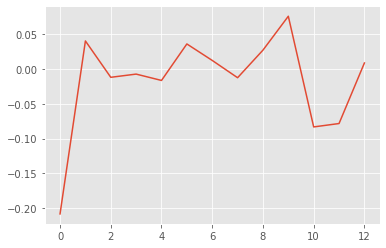

In [293]:
plt.plot(ridgereg_c.coef_)
plt.show()

#### Evaluate Ridge model performance for C

In [294]:
print_metrics(ridgereg_c, c_train_x, c_train_y, c_test_x, c_test_y, flag_log_sale_price = True)
print_metrics(ridgereg_c, c_train_x, c_train_y, c_test_x, c_test_y, flag_log_sale_price = False)


Metrics for Log(Ridge):

Training R2 0.5571264747855148
Training MAE 0.045078739125239436
Training RMSE 0.0627464305977496
Test R2 0.5618570577342632
Test MAE 0.044186064200945493
Test RMSE 0.06022205598617309

Metrics for Ridge:

Training R2 0.543223758645943
Training MAE 0.05192114466530042
Training RMSE 0.07828550943636332
Test R2 0.5639801030192555
Test MAE 0.05055455133818863
Test RMSE 0.07241460644247127


#### New Ridge Dataframe for C

In [295]:
modelResult_C.loc[2, 'Model'] = 'ridgeCtrain'
modelResult_C.loc[2, 'R2'] = 0.5571264747855148
modelResult_C.loc[2, 'RMSE'] = 0.045078739125239436
modelResult_C.loc[2, 'MAE'] = 0.0627464305977496
modelResult_C.loc[3, 'Model'] = 'ridgeCtest'
modelResult_C.loc[3, 'R2'] = 0.5618570577342632
modelResult_C.loc[3, 'RMSE'] = 0.044186064200945493
modelResult_C.loc[3, 'MAE'] = 0.06022205598617309
modelResult_C

,Model,R2,RMSE,MAE
0,lassoCtrain,0.963169,0.018095,0.012779
1,lassoCtest,0.960780,0.018018,0.013134
2,ridgeCtrain,0.557126,0.045079,0.062746
3,ridgeCtest,0.561857,0.044186,0.060222


#### Ridge Actual Pcap and Predicted Pcap by Positions

In [296]:
columns1 = {'PG Actual Pcap': pg_test_y, 'PG Pred Pcap': ridgereg_pg.predict(pg_test_x)}
df1= pd.DataFrame(data=columns1)
df1

,PG Actual Pcap,PG Pred Pcap
2671,0.081183,0.060653
6179,0.018560,0.046137
8281,0.010121,0.051309
2222,0.069135,0.071943
5085,0.067752,0.077076
...,...,...
6435,0.025577,0.082044
3972,0.138648,0.206579
9420,0.077675,0.050777
5890,0.019831,0.005449


In [297]:
columns2 = {'SG Actual Pcap': sg_test_y, 'SG Pred Pcap': ridgereg_sg.predict(sg_test_x)}
df2= pd.DataFrame(data=columns2)
df2

,SG Actual Pcap,SG Pred Pcap
956,0.015383,-0.029747
473,0.086471,0.099937
3865,0.169514,0.159671
996,0.027845,0.020234
1287,0.140775,0.184288
...,...,...
2998,0.021178,0.049711
7143,0.063380,0.104143
186,0.011498,0.087585
9508,0.065773,0.046204


In [298]:
columns3 = {'SF Actual Pcap': sf_test_y, 'SF Pred Pcap': ridgereg_sf.predict(sf_test_x)}
df3= pd.DataFrame(data=columns3)
df3

,SF Actual Pcap,SF Pred Pcap
2554,0.158784,0.092381
1813,0.241429,0.200630
5018,0.037156,0.060224
2788,0.014644,0.022143
1399,0.138088,0.083407
...,...,...
8845,0.010159,0.108572
806,0.026670,0.006328
5862,0.008782,0.004440
7763,0.008879,-0.011795


In [299]:
columns4 = {'PF Actual Pcap': pf_test_y, 'PF Pred Pcap': ridgereg_pf.predict(pf_test_x)}
df4= pd.DataFrame(data=columns4)
df4

,PF Actual Pcap,PF Pred Pcap
347,0.169866,0.154206
1068,0.084829,0.156266
7155,0.162254,0.206194
4014,0.152080,0.074843
1161,0.064678,0.037508
...,...,...
10802,0.021060,0.017843
5542,0.040404,0.014496
10677,0.033696,0.000874
9545,0.089160,0.039315


In [300]:
columns5 = {'C Actual Pcap': c_test_y, 'C Pred Pcap': ridgereg_c.predict(c_test_x)}
df1= pd.DataFrame(data=columns5)
df1

,C Actual Pcap,C Pred Pcap
3142,0.173651,0.089812
9977,0.030714,0.050979
1799,0.018571,0.062911
2715,0.008159,0.019038
2539,0.131687,0.141296
...,...,...
5561,0.042766,0.106240
9880,0.142000,0.052380
6847,0.336842,0.231354
361,0.019951,0.080570


## 4-3) Decision Tree

#### Feature Engineering and Selection for Decision Tree

In [301]:
pg_train, pg_test = train_test_split(pg, test_size=0.25, random_state=123)
sg_train, sg_test = train_test_split(sg, test_size=0.25, random_state=123)
sf_train, sf_test = train_test_split(sf, test_size=0.25, random_state=123)
pf_train, pf_test = train_test_split(pf, test_size=0.25, random_state=123)
c_train, c_test = train_test_split(c, test_size=0.25, random_state=123)

pg_train

,FGP,X3PM,X3PA,X3PP,FTM,FTA,FTP,ORB,DRB,AST,...,PF,PTS,TS,X3PAr,FTr,USG,OWS,DWS,Experience,pCap
9185,0.433,0.0,0.4,0.107,1.7,2.3,0.751,0.6,1.6,3.3,...,1.5,7.7,0.490,0.053,0.338,18.1,0.5,1.1,6,0.030435
5986,0.393,0.3,1.0,0.246,1.5,2.0,0.789,0.1,1.4,3.3,...,1.8,6.8,0.471,0.160,0.309,21.2,-0.9,0.5,1,0.035543
10807,0.476,1.2,3.1,0.385,3.7,4.6,0.803,1.1,3.0,9.7,...,2.8,22.9,0.547,0.162,0.246,24.7,7.4,2.5,0,0.042119
9071,0.381,1.5,3.6,0.405,1.1,1.5,0.700,0.6,1.9,2.4,...,2.3,8.5,0.499,0.460,0.191,17.0,1.3,2.6,3,0.062783
3660,0.426,1.7,4.6,0.376,2.6,3.3,0.765,1.2,2.9,6.7,...,2.8,13.5,0.550,0.424,0.310,18.6,5.1,1.8,4,0.099063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,0.371,0.5,1.7,0.328,1.0,1.4,0.727,0.7,1.6,4.3,...,2.4,7.5,0.437,0.210,0.181,15.2,-0.4,0.8,0,0.008996
5999,0.328,0.8,2.1,0.387,0.8,0.9,0.805,0.4,1.2,1.6,...,1.1,4.3,0.468,0.500,0.220,16.4,0.0,0.2,2,0.014134
9040,0.447,0.1,0.5,0.296,1.1,1.2,0.861,0.3,0.6,1.8,...,1.0,3.0,0.590,0.237,0.632,16.1,0.8,0.5,3,0.015217
5870,0.423,0.1,0.3,0.462,0.6,0.9,0.730,0.6,1.5,2.4,...,2.0,4.7,0.467,0.065,0.184,16.1,-0.1,0.3,14,0.025074


#### Helper Function for Decision Tree

In [302]:
def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):
        
        y_pred_train = pd.Series(model.predict(X_train)).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).reset_index(drop=True)
        y_train = y_train.copy().reset_index(drop=True)
        y_test = y_test.copy().reset_index(drop=True)
        
        print("\nMetrics for Log(Decision Tree):\n")
        
    elif (flag_log_sale_price == False):
        
        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp).reset_index(drop=True)
        y_train = y_train.copy().apply(np.exp).reset_index(drop=True)
        y_test = y_test.copy().apply(np.exp).reset_index(drop=True)
        
        print("\nMetrics for Decision Tree:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))
    print('Training RMSE', RMSE(y_train, y_pred_train))

    print('Test R2', OSR2(y_test, y_test, y_pred_test))
    print('Test MAE', MAE(y_test, y_pred_test))
    print('Test RMSE', RMSE(y_test, y_pred_test))
    
    return None

### PG Decision Tree

In [303]:
pg_train_x = pg_train.drop('pCap', axis=1)
pg_train_y = pg_train['pCap']
pg_test_x = pg_test.drop('pCap', axis=1)
pg_test_y = pg_test['pCap']

#### Define the grid values and perform the Grid Search Cross-Validation for PG

In [304]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_PG = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_PG.fit(pg_train_x, pg_train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

#### Select the best hyperparameter for PG

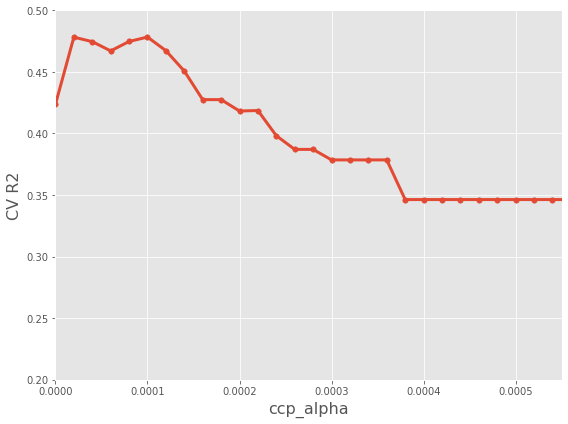

In [305]:
ccp_alpha = dtr_PG.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_PG.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [306]:
print('Best ccp_alpha', dtr_PG.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0001}


#### Evaluate the Decision tree model performance for PG

In [307]:
print_metrics(dtr_PG, pg_train_x, pg_train_y, pg_test_x, pg_test_y, flag_log_sale_price = True)
print_metrics(dtr_PG, pg_train_x, pg_train_y, pg_test_x, pg_test_y, flag_log_sale_price = False)


Metrics for Log(Decision Tree):

Training R2 0.565893976056536
Training MAE 0.03498874939370374
Training RMSE 0.048537916067956426
Test R2 0.5202892486446595
Test MAE 0.037076510094260134
Test RMSE 0.051457539123900976

Metrics for Decision Tree:

Training R2 0.559170766500815
Training MAE 0.03909633905655617
Training RMSE 0.056348509678884606
Test R2 0.5154688887339022
Test MAE 0.04143387898163239
Test RMSE 0.05947129757777569


#### New Decision Tree Dataframe for PG

In [308]:
modelResult_PG.loc[4, 'Model'] = 'dtrPGtrain'
modelResult_PG.loc[4, 'R2'] = 0.565893976056536
modelResult_PG.loc[4, 'RMSE'] = 0.03498874939370374
modelResult_PG.loc[4, 'MAE'] = 0.048537916067956426
modelResult_PG.loc[5, 'Model'] = 'dtrPGtest'
modelResult_PG.loc[5, 'R2'] = 0.5202892486446595
modelResult_PG.loc[5, 'RMSE'] = 0.037076510094260134
modelResult_PG.loc[5, 'MAE'] = 0.051457539123900976
modelResult_PG

,Model,R2,RMSE,MAE
0,lassoPGtrain,0.966388,0.013506,0.009597
1,lassoPGtest,0.961698,0.014540,0.010290
2,ridgePGtrain,0.547914,0.036147,0.049533
3,ridgePGtest,0.532978,0.037378,0.050772
4,dtrPGtrain,0.565894,0.034989,0.048538
5,dtrPGtest,0.520289,0.037077,0.051458


### SG Decision Tree

In [309]:
sg_train_x = sg_train.drop('pCap', axis=1)
sg_train_y = sg_train['pCap']
sg_test_x = sg_test.drop('pCap', axis=1)
sg_test_y = sg_test['pCap']

#### Define the grid values and perform the Grid Search Cross-Validation for SG

In [310]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_SG = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_SG.fit(sg_train_x, sg_train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

#### Select the best hyperparameter for SG

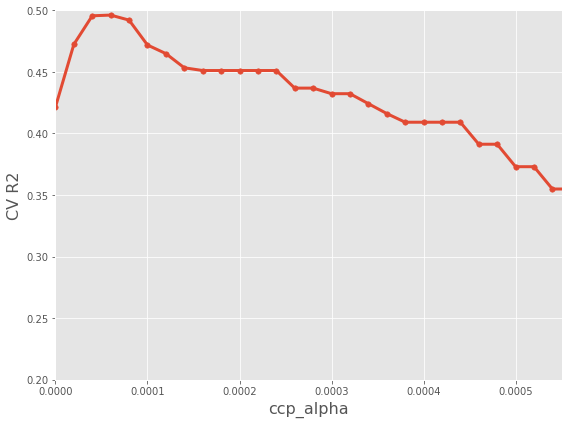

In [311]:
ccp_alpha = dtr_SG.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_SG.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [312]:
print('Best ccp_alpha', dtr_SG.best_params_)

Best ccp_alpha {'ccp_alpha': 6.000000000000001e-05}


#### Evaluate the Decision Tree model performance for SG

In [313]:
print_metrics(dtr_SG, sg_train_x, sg_train_y, sg_test_x, sg_test_y, flag_log_sale_price = True)
print_metrics(dtr_SG, sg_train_x, sg_train_y, sg_test_x, sg_test_y, flag_log_sale_price = False)


Metrics for Log(Decision Tree):

Training R2 0.5704750702520535
Training MAE 0.03501406899326627
Training RMSE 0.05711303774892287
Test R2 0.5133478687215682
Test MAE 0.03820479772486384
Test RMSE 0.05259667860291724

Metrics for Decision Tree:

Training R2 0.4643352483425681
Training MAE 0.04070957247701527
Training RMSE 0.0889293847190742
Test R2 0.49713360153678043
Test MAE 0.04305467362916612
Test RMSE 0.061644823717856685


#### New Decision Tree Dataframe for SG

In [314]:
modelResult_SG.loc[4, 'Model'] = 'dtrSGtrain'
modelResult_SG.loc[4, 'R2'] = 0.5704750702520535
modelResult_SG.loc[4, 'RMSE'] = 0.03501406899326627
modelResult_SG.loc[4, 'MAE'] = 0.05711303774892287
modelResult_SG.loc[5, 'Model'] = 'dtrSGtest'
modelResult_SG.loc[5, 'R2'] = 0.5133478687215682
modelResult_SG.loc[5, 'RMSE'] = 0.03820479772486384
modelResult_SG.loc[5, 'MAE'] = 0.05259667860291724
modelResult_SG

,Model,R2,RMSE,MAE
0,lassoSGtrain,0.973516,0.014182,0.009856
1,lassoSGtest,0.958190,0.015417,0.010716
2,ridgeSGtrain,0.516273,0.037625,0.060610
3,ridgeSGtest,0.526516,0.038368,0.051880
4,dtrSGtrain,0.570475,0.035014,0.057113
5,dtrSGtest,0.513348,0.038205,0.052597


### SF Decision Tree

In [315]:
sf_train_x = sf_train.drop('pCap', axis=1)
sf_train_y = sf_train['pCap']
sf_test_x = sf_test.drop('pCap', axis=1)
sf_test_y = sf_test['pCap']

#### Define the grid values and perform the Grid Search Cross-Validation for SF

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_SF = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_SF.fit(sf_train_x, sf_train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

#### Select the best hyperparameter for SF

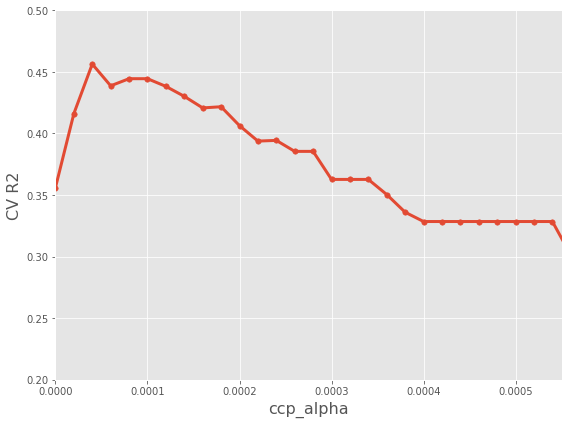

In [317]:
ccp_alpha = dtr_SF.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_SF.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [318]:
print('Best ccp_alpha', dtr_SF.best_params_)

Best ccp_alpha {'ccp_alpha': 4e-05}


#### Evaluate the Decision tree model performance for SF

In [319]:
print_metrics(dtr_SF, sf_train_x, sf_train_y, sf_test_x, sf_test_y, flag_log_sale_price = True)
print_metrics(dtr_SF, sf_train_x, sf_train_y, sf_test_x, sf_test_y, flag_log_sale_price = False)


Metrics for Log(Decision Tree):

Training R2 0.5753766821197984
Training MAE 0.03670325381895993
Training RMSE 0.050768034852821
Test R2 0.4539830506627006
Test MAE 0.03947973222630967
Test RMSE 0.05907010060630755

Metrics for Decision Tree:

Training R2 0.5691131527732949
Training MAE 0.04127309513832841
Training RMSE 0.05940518159136733
Test R2 0.4333364236529833
Test MAE 0.04456161985529131
Test RMSE 0.07017646377719479


#### New Decision Tree Dataframe for SF

In [320]:
modelResult_SF.loc[4, 'Model'] = 'dtrSFtrain'
modelResult_SF.loc[4, 'R2'] = 0.5753766821197984
modelResult_SF.loc[4, 'RMSE'] = 0.03670325381895993
modelResult_SF.loc[4, 'MAE'] = 0.050768034852821
modelResult_SF.loc[5, 'Model'] = 'dtrSFtest'
modelResult_SF.loc[5, 'R2'] = 0.4539830506627006
modelResult_SF.loc[5, 'RMSE'] = 0.03947973222630967
modelResult_SF.loc[5, 'MAE'] = 0.05907010060630755
modelResult_SF

,Model,R2,RMSE,MAE
0,lassoSFtrain,0.955475,0.016440,0.011155
1,lassoSFtest,0.957006,0.016576,0.011151
2,ridgeSFtrain,0.512246,0.038736,0.054411
3,ridgeSFtest,0.525867,0.038368,0.055045
4,dtrSFtrain,0.575377,0.036703,0.050768
5,dtrSFtest,0.453983,0.039480,0.059070


### PF Decision Tree

In [321]:
pf_train_x = pf_train.drop('pCap', axis=1)
pf_train_y = pf_train['pCap']
pf_test_x = pf_test.drop('pCap', axis=1)
pf_test_y = pf_test['pCap']

#### Define the grid values and perform the Grid Search Cross-Validation for PF

In [322]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_PF = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_PF.fit(pf_train_x, pf_train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

#### Select the best hyperparameter for PF

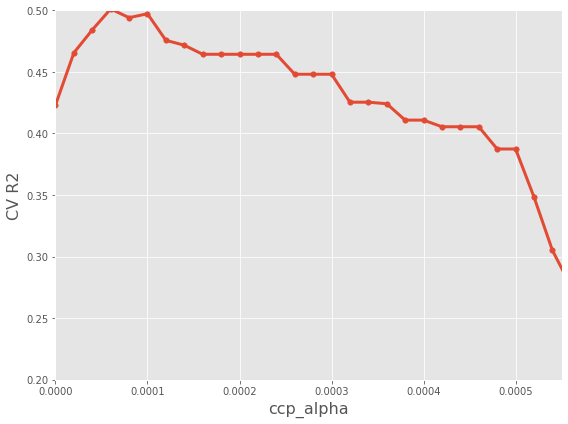

In [323]:
ccp_alpha = dtr_PF.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_PF.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [324]:
print('Best ccp_alpha', dtr_PF.best_params_)

Best ccp_alpha {'ccp_alpha': 6.000000000000001e-05}


#### Evaluate the Decision Tree model performance for PF

In [325]:
print_metrics(dtr_PF, pf_train_x, pf_train_y, pf_test_x, pf_test_y, flag_log_sale_price = True)
print_metrics(dtr_PF, pf_train_x, pf_train_y, pf_test_x, pf_test_y, flag_log_sale_price = False)


Metrics for Log(Decision Tree):

Training R2 0.5764889696469012
Training MAE 0.040223592184187765
Training RMSE 0.056745034670033036
Test R2 0.5171596679059776
Test MAE 0.04370994202086501
Test RMSE 0.062458602917887324

Metrics for Decision Tree:

Training R2 0.5696317077773776
Training MAE 0.04589896771698607
Training RMSE 0.06811871155236852
Test R2 0.5069060679900423
Test MAE 0.05030388603673579
Test RMSE 0.07605642564223686


#### New Decision Tree Dataframe for PF

In [326]:
modelResult_PF.loc[4, 'Model'] = 'dtrPFtrain'
modelResult_PF.loc[4, 'R2'] = 0.5764889696469012
modelResult_PF.loc[4, 'RMSE'] = 0.040223592184187765
modelResult_PF.loc[4, 'MAE'] = 0.056745034670033036
modelResult_PF.loc[5, 'Model'] = 'dtrPFtest'
modelResult_PF.loc[5, 'R2'] = 0.5171596679059776
modelResult_PF.loc[5, 'RMSE'] = 0.04370994202086501
modelResult_PF.loc[5, 'MAE'] = 0.062458602917887324
modelResult_PF

,Model,R2,RMSE,MAE
0,lassoPFtrain,0.965376,0.016225,0.011491
1,lassoPFtest,0.965858,0.016609,0.011811
2,ridgePFtrain,0.564713,0.040138,0.057529
3,ridgePFtest,0.571891,0.041045,0.058812
4,dtrPFtrain,0.576489,0.040224,0.056745
5,dtrPFtest,0.517160,0.043710,0.062459


### C Decision Tree

In [327]:
c_train_x = c_train.drop('pCap', axis=1)
c_train_y = c_train['pCap']
c_test_x = c_test.drop('pCap', axis=1)
c_test_y = c_test['pCap']

#### Define the grid values and perform the Grid Search Cross-Validation for C

In [328]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_C = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_C.fit(c_train_x, c_train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

#### Select the best hyperparameter for C

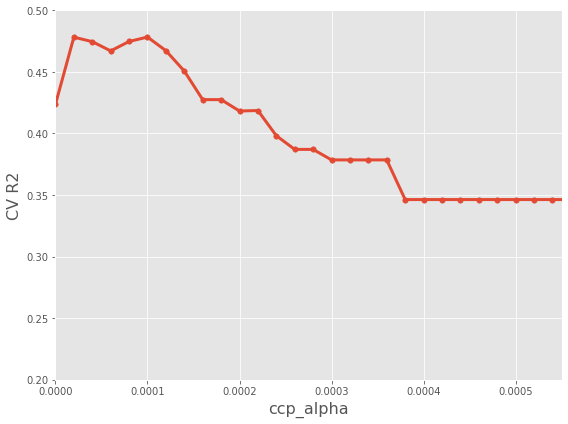

In [329]:
ccp_alpha = dtr_PG.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_PG.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [330]:
print('Best ccp_alpha', dtr_C.best_params_)

Best ccp_alpha {'ccp_alpha': 4e-05}


#### Evaluate the Decision Tree model performance for C

In [331]:
print_metrics(dtr_C, c_train_x, c_train_y, c_test_x, c_test_y, flag_log_sale_price = True)
print_metrics(dtr_C, c_train_x, c_train_y, c_test_x, c_test_y, flag_log_sale_price = False)


Metrics for Log(Decision Tree):

Training R2 0.6470223957462862
Training MAE 0.040718419579529465
Training RMSE 0.0560173734250019
Test R2 0.5177797891919909
Test MAE 0.04471010521442529
Test RMSE 0.06317865446895171

Metrics for Decision Tree:

Training R2 0.6529735879145786
Training MAE 0.04664237572982904
Training RMSE 0.06823558101149252
Test R2 0.501864206064544
Test MAE 0.05136669380082293
Test RMSE 0.07740105770287553


#### New Decision Tree Dataframe for C

In [332]:
modelResult_C.loc[4, 'Model'] = 'dtrCtrain'
modelResult_C.loc[4, 'R2'] = 0.6470223957462862
modelResult_C.loc[4, 'RMSE'] = 0.040718419579529465
modelResult_C.loc[4, 'MAE'] = 0.0560173734250019
modelResult_C.loc[5, 'Model'] = 'dtrCtest'
modelResult_C.loc[5, 'R2'] = 0.5177797891919909
modelResult_C.loc[5, 'RMSE'] = 0.04471010521442529
modelResult_C.loc[5, 'MAE'] = 0.06317865446895171
modelResult_C

,Model,R2,RMSE,MAE
0,lassoCtrain,0.963169,0.018095,0.012779
1,lassoCtest,0.960780,0.018018,0.013134
2,ridgeCtrain,0.557126,0.045079,0.062746
3,ridgeCtest,0.561857,0.044186,0.060222
4,dtrCtrain,0.647022,0.040718,0.056017
5,dtrCtest,0.517780,0.044710,0.063179


## 5. Final Comparison Table for all Model(Output)

In [333]:
print('Summary Model Results by Positions')
print('PG Result: \n', modelResult_PG)
print('\nSG Result: \n', modelResult_SG)
print('\nSF Result: \n', modelResult_SF)
print('\nPF Result: \n', modelResult_PF)
print('\nC Result: \n', modelResult_C)

Summary Model Results by Positions
PG Result: 
           Model        R2      RMSE       MAE
0  lassoPGtrain  0.966388  0.013506  0.009597
1   lassoPGtest  0.961698  0.014540  0.010290
2  ridgePGtrain  0.547914  0.036147  0.049533
3   ridgePGtest  0.532978  0.037378  0.050772
4    dtrPGtrain  0.565894  0.034989  0.048538
5     dtrPGtest  0.520289  0.037077  0.051458

SG Result: 
           Model        R2      RMSE       MAE
0  lassoSGtrain  0.973516  0.014182  0.009856
1   lassoSGtest  0.958190  0.015417  0.010716
2  ridgeSGtrain  0.516273  0.037625  0.060610
3   ridgeSGtest  0.526516  0.038368  0.051880
4    dtrSGtrain  0.570475  0.035014  0.057113
5     dtrSGtest  0.513348  0.038205  0.052597

SF Result: 
           Model        R2      RMSE       MAE
0  lassoSFtrain  0.955475  0.016440  0.011155
1   lassoSFtest  0.957006  0.016576  0.011151
2  ridgeSFtrain  0.512246  0.038736  0.054411
3   ridgeSFtest  0.525867  0.038368  0.055045
4    dtrSFtrain  0.575377  0.036703  0.050768
5   